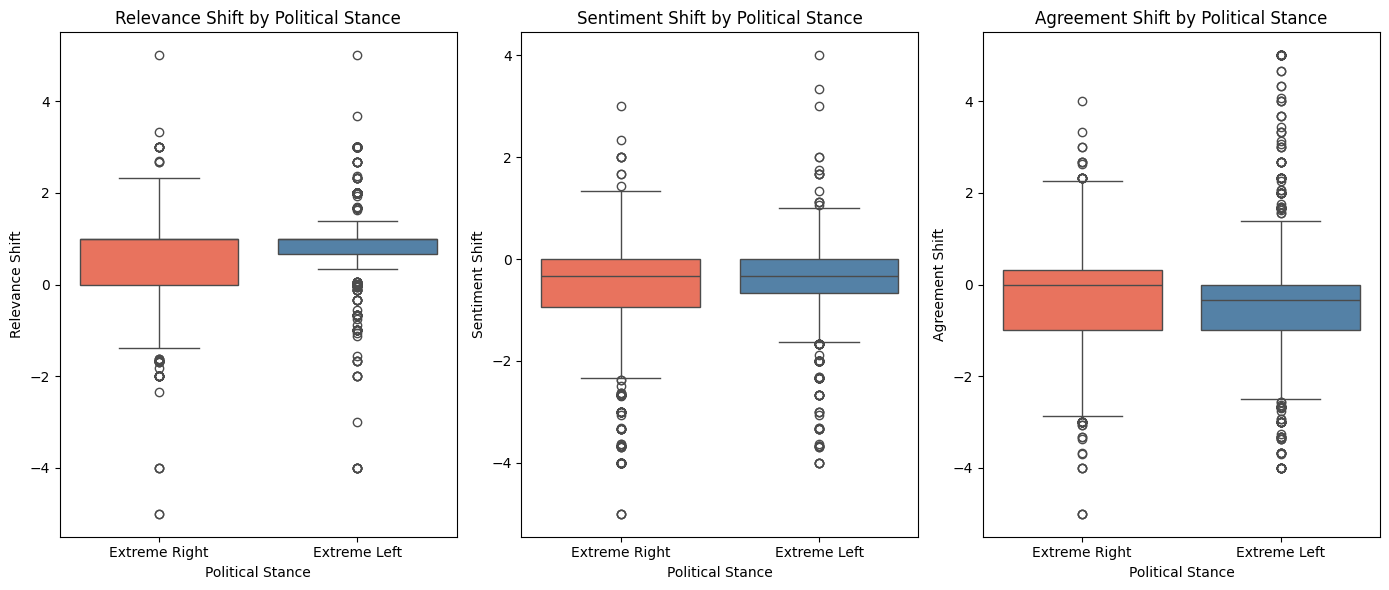

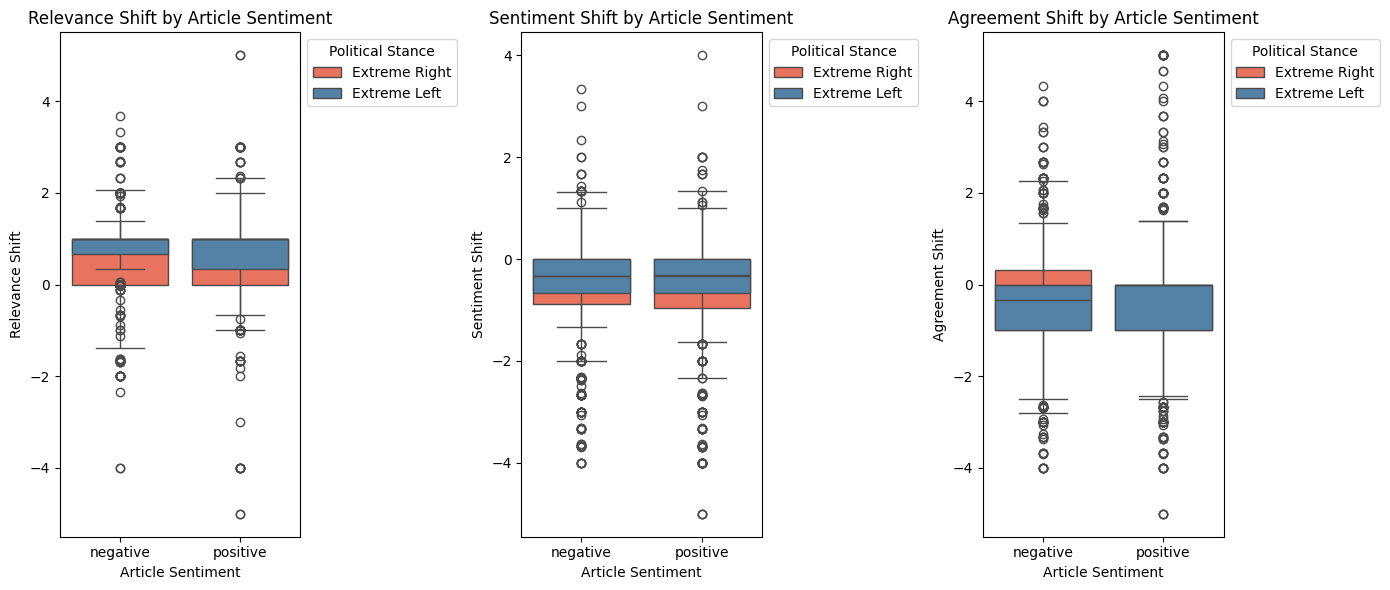

In [18]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Load the persona data
persona_df = pd.read_csv("../data/processed/combined_data.csv")

# Load the shifts data
shifts = json.loads(Path("../data/processed/shifts.json").read_text())
shifts_df = pd.DataFrame(shifts)

# Clean persona data: Combine "Far Left" and "Extreme Left" into "Extreme Left"
persona_df['Where would you place your own political position?'] = persona_df['Where would you place your own political position?'].replace({'Far Left': 'Extreme Left'})

# Merge shifts with persona data on `user_id`
merged_df = pd.merge(shifts_df, persona_df, left_on='user_id', right_on='user')

# Aggregate the shifts for each persona and question
agg_df = merged_df.groupby(['user_id', 'question', 'article_sentiment', 'Where would you place your own political position?']).agg({
    'relevance_shift': 'mean',
    'sentiment_shift': 'mean',
    'agreement_shift': 'mean'
}).reset_index()

# Save the aggregated data
output_path = "../data/processed/aggregated_shifts_persona_data.csv"
Path(output_path).parent.mkdir(parents=True, exist_ok=True)  # Ensure directory exists
agg_df.to_csv(output_path, index=False)

# Define custom color palette for political positions
political_palette = {
    'Extreme Right': '#FF6347',   # Tomato color for extreme right
    'Extreme Left': '#4682B4'     # SteelBlue color for extreme left
}

# Plot shifts by political stance
plt.figure(figsize=(14, 6))

# Relevance Shift
plt.subplot(1, 3, 1)
sns.boxplot(data=agg_df, x='Where would you place your own political position?', y='relevance_shift', hue='Where would you place your own political position?', palette=political_palette, dodge=False)
plt.title("Relevance Shift by Political Stance")
plt.xlabel("Political Stance")
plt.ylabel("Relevance Shift")


# Sentiment Shift
plt.subplot(1, 3, 2)
sns.boxplot(data=agg_df, x='Where would you place your own political position?', y='sentiment_shift', hue='Where would you place your own political position?', palette=political_palette, dodge=False)
plt.title("Sentiment Shift by Political Stance")
plt.xlabel("Political Stance")
plt.ylabel("Sentiment Shift")


# Agreement Shift
plt.subplot(1, 3, 3)
sns.boxplot(data=agg_df, x='Where would you place your own political position?', y='agreement_shift', hue='Where would you place your own political position?', palette=political_palette, dodge=False)
plt.title("Agreement Shift by Political Stance")
plt.xlabel("Political Stance")
plt.ylabel("Agreement Shift")


plt.tight_layout()
plt.show()

# Breakdown by Article Sentiment (Positive vs Negative)
plt.figure(figsize=(14, 6))

# Relevance Shift by Article Sentiment
plt.subplot(1, 3, 1)
sns.boxplot(data=agg_df, x='article_sentiment', y='relevance_shift', hue='Where would you place your own political position?', palette=political_palette, dodge=False)
plt.title("Relevance Shift by Article Sentiment")
plt.xlabel("Article Sentiment")
plt.ylabel("Relevance Shift")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Political Stance')

# Sentiment Shift by Article Sentiment
plt.subplot(1, 3, 2)
sns.boxplot(data=agg_df, x='article_sentiment', y='sentiment_shift', hue='Where would you place your own political position?', palette=political_palette, dodge=False)
plt.title("Sentiment Shift by Article Sentiment")
plt.xlabel("Article Sentiment")
plt.ylabel("Sentiment Shift")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Political Stance')

# Agreement Shift by Article Sentiment
plt.subplot(1, 3, 3)
sns.boxplot(data=agg_df, x='article_sentiment', y='agreement_shift', hue='Where would you place your own political position?', palette=political_palette, dodge=False)
plt.title("Agreement Shift by Article Sentiment")
plt.xlabel("Article Sentiment")
plt.ylabel("Agreement Shift")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Political Stance')

plt.tight_layout()
plt.show();


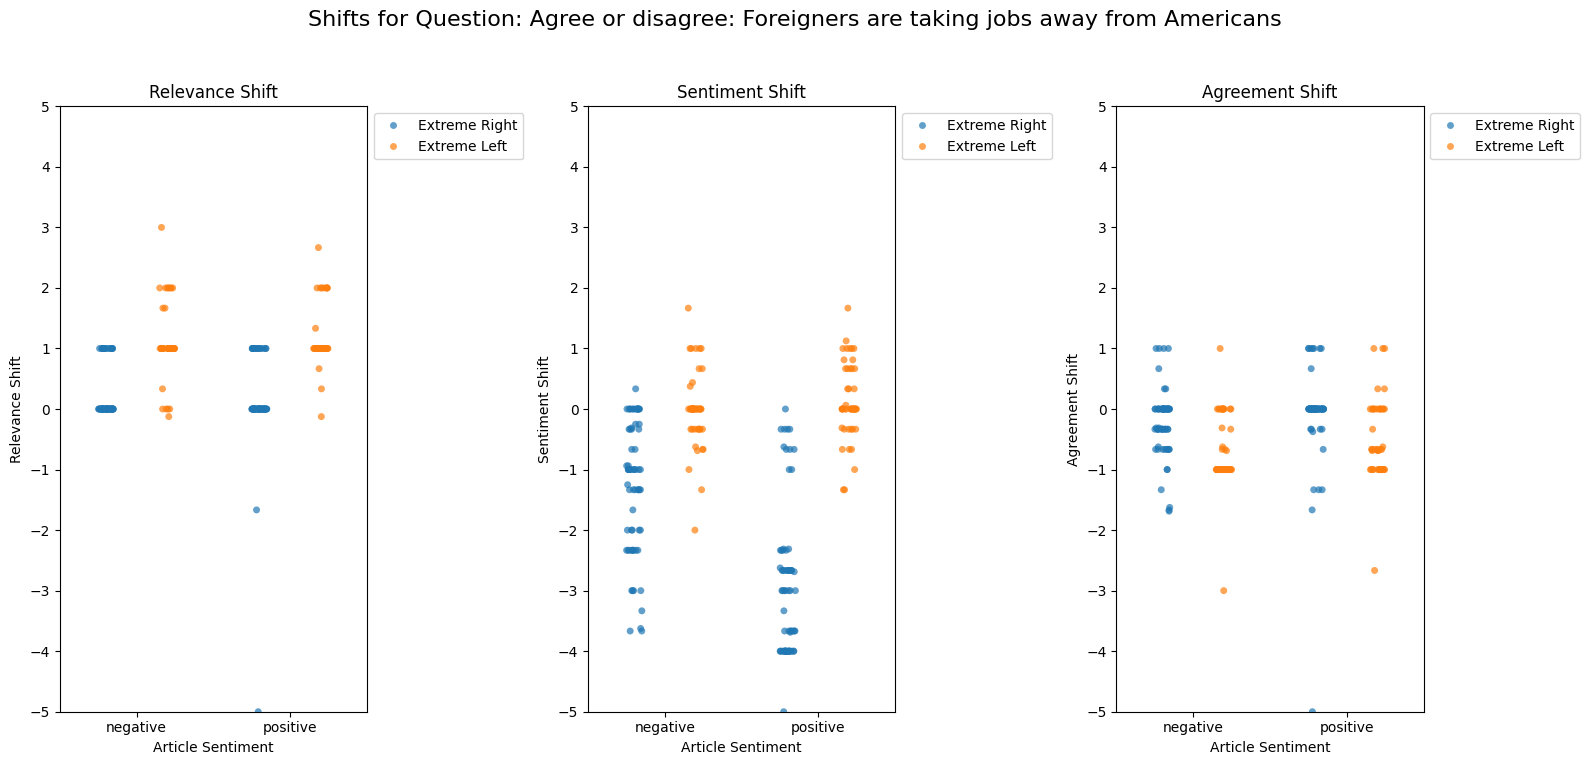

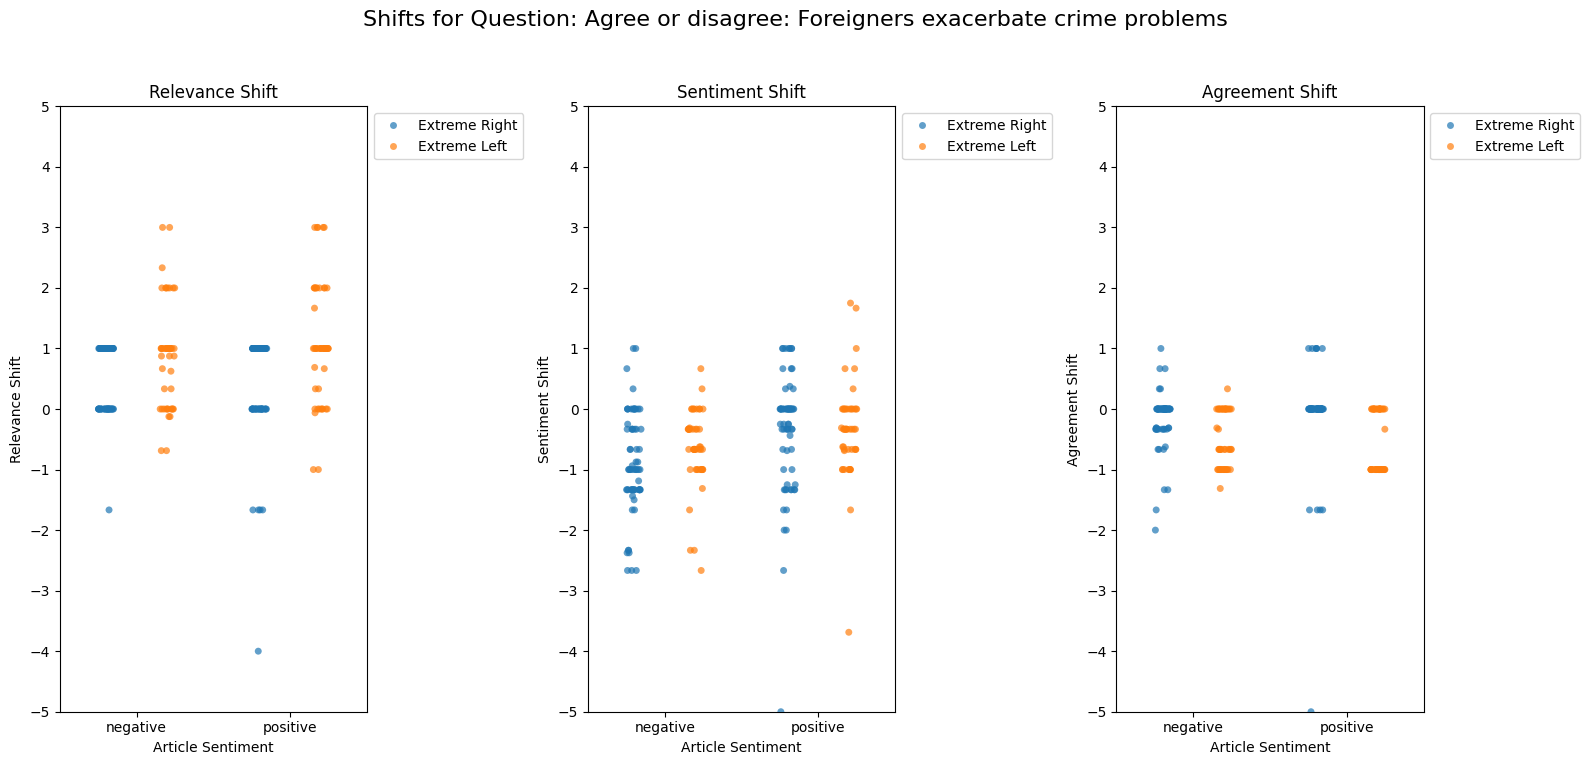

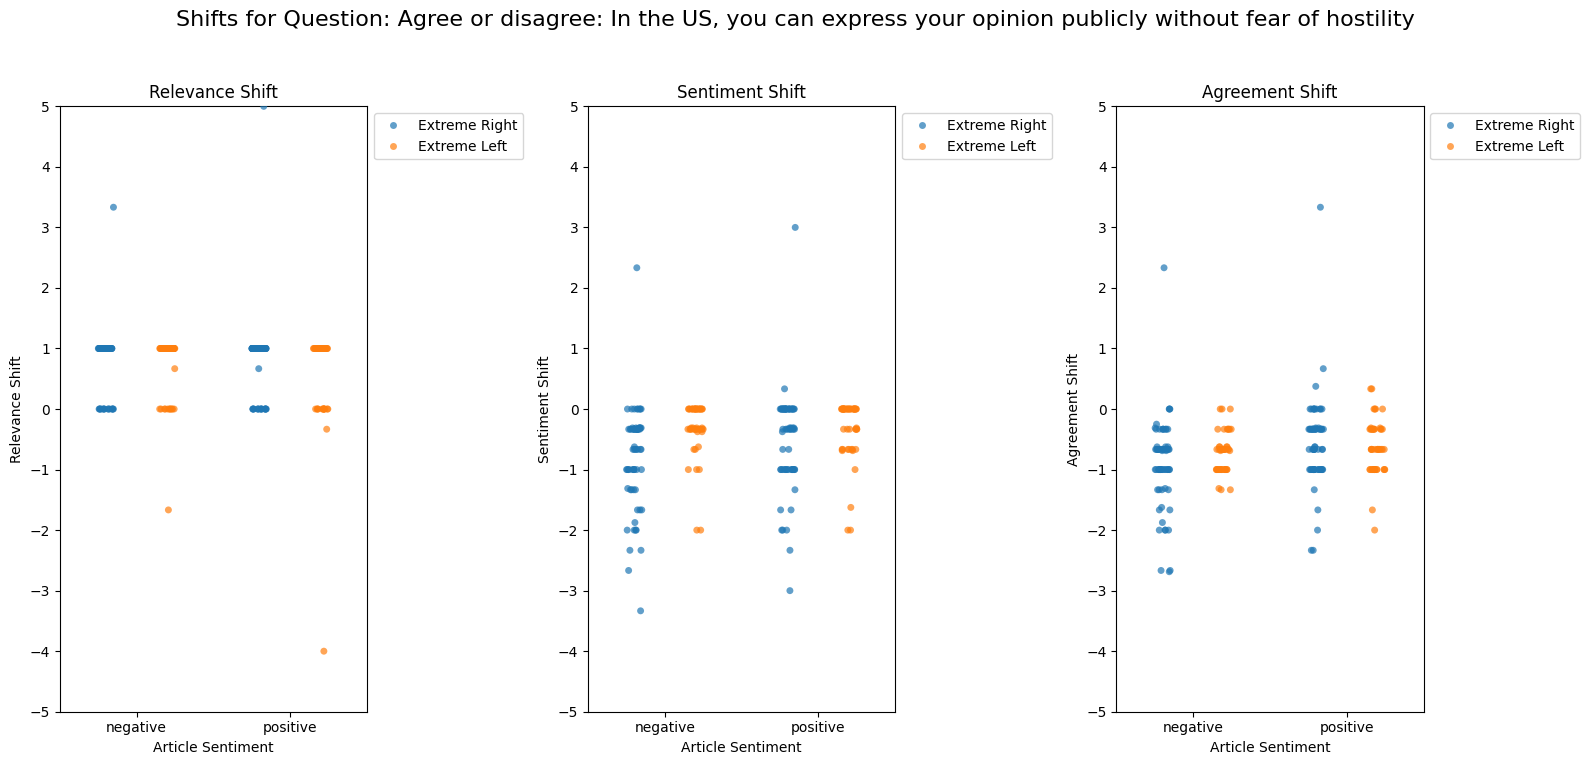

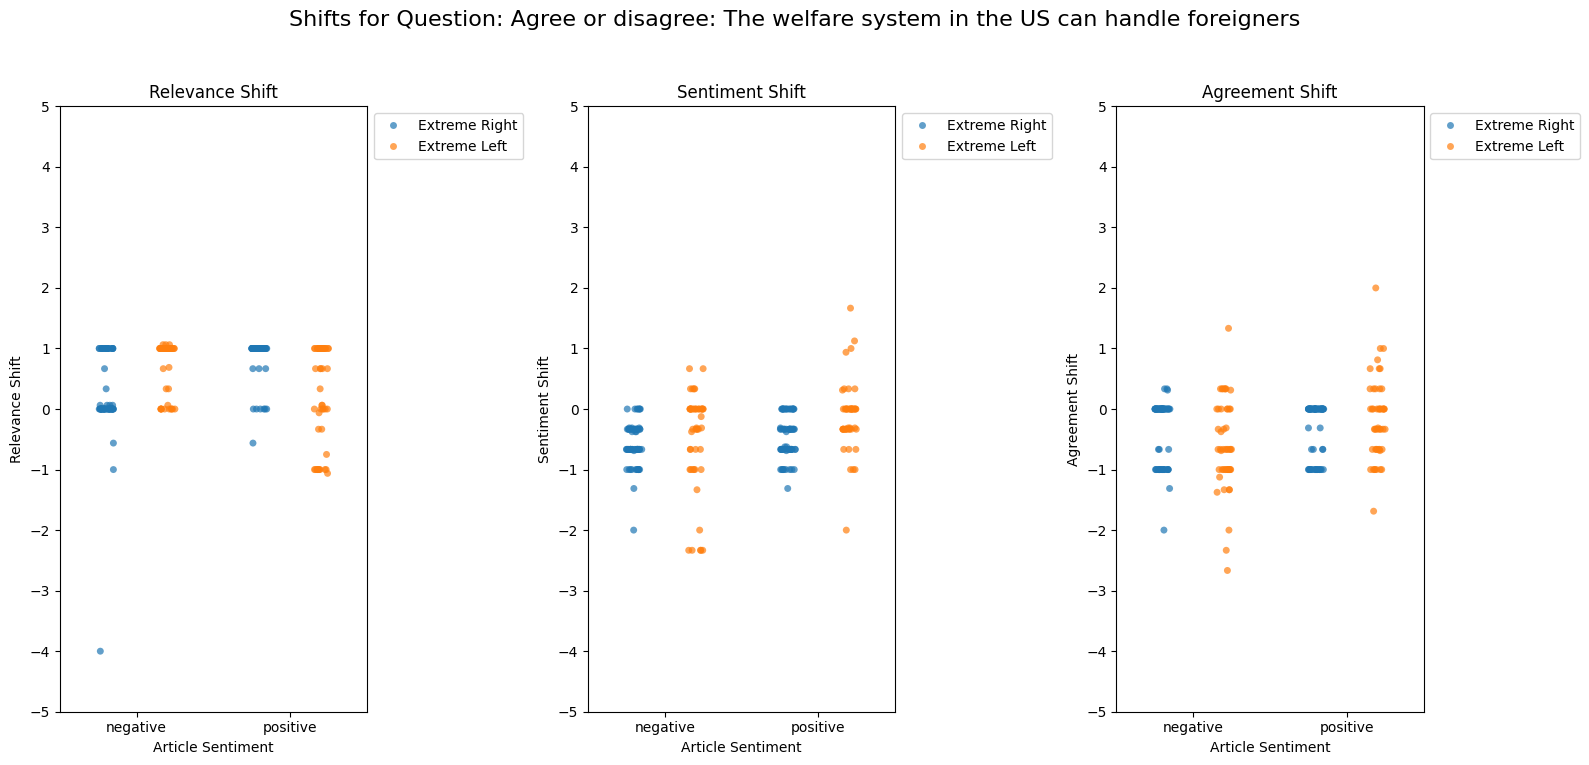

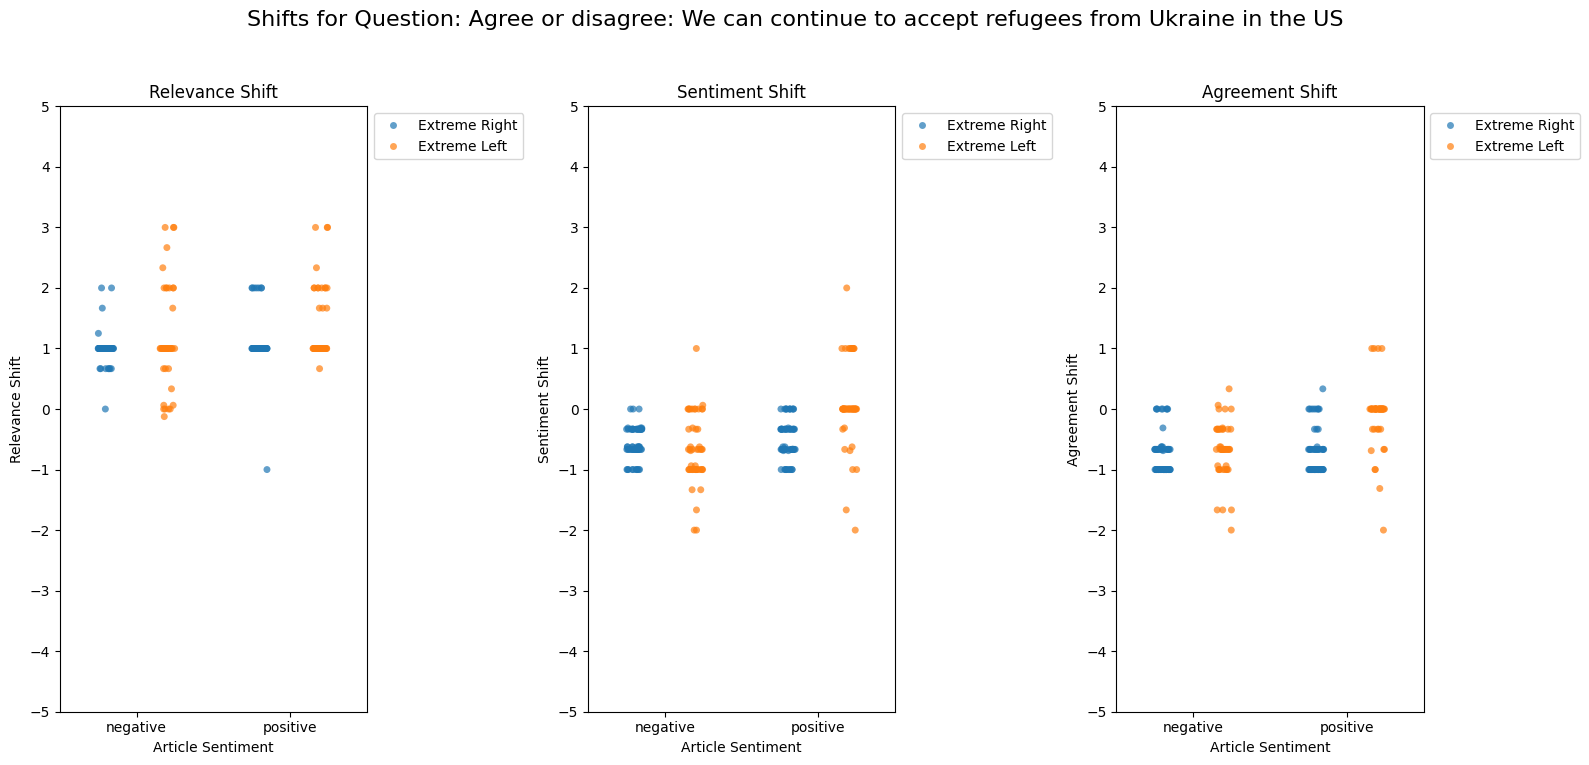

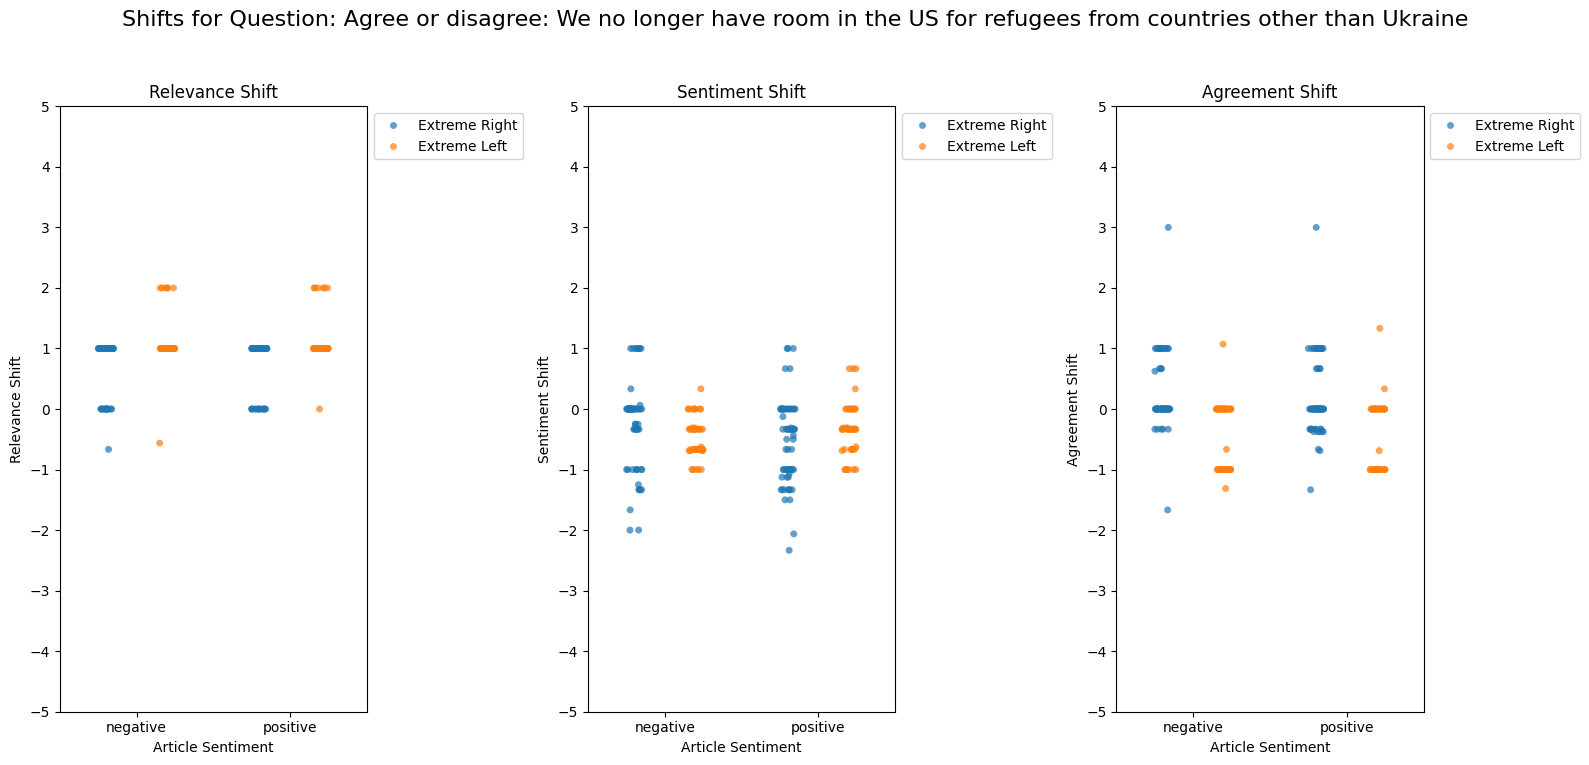

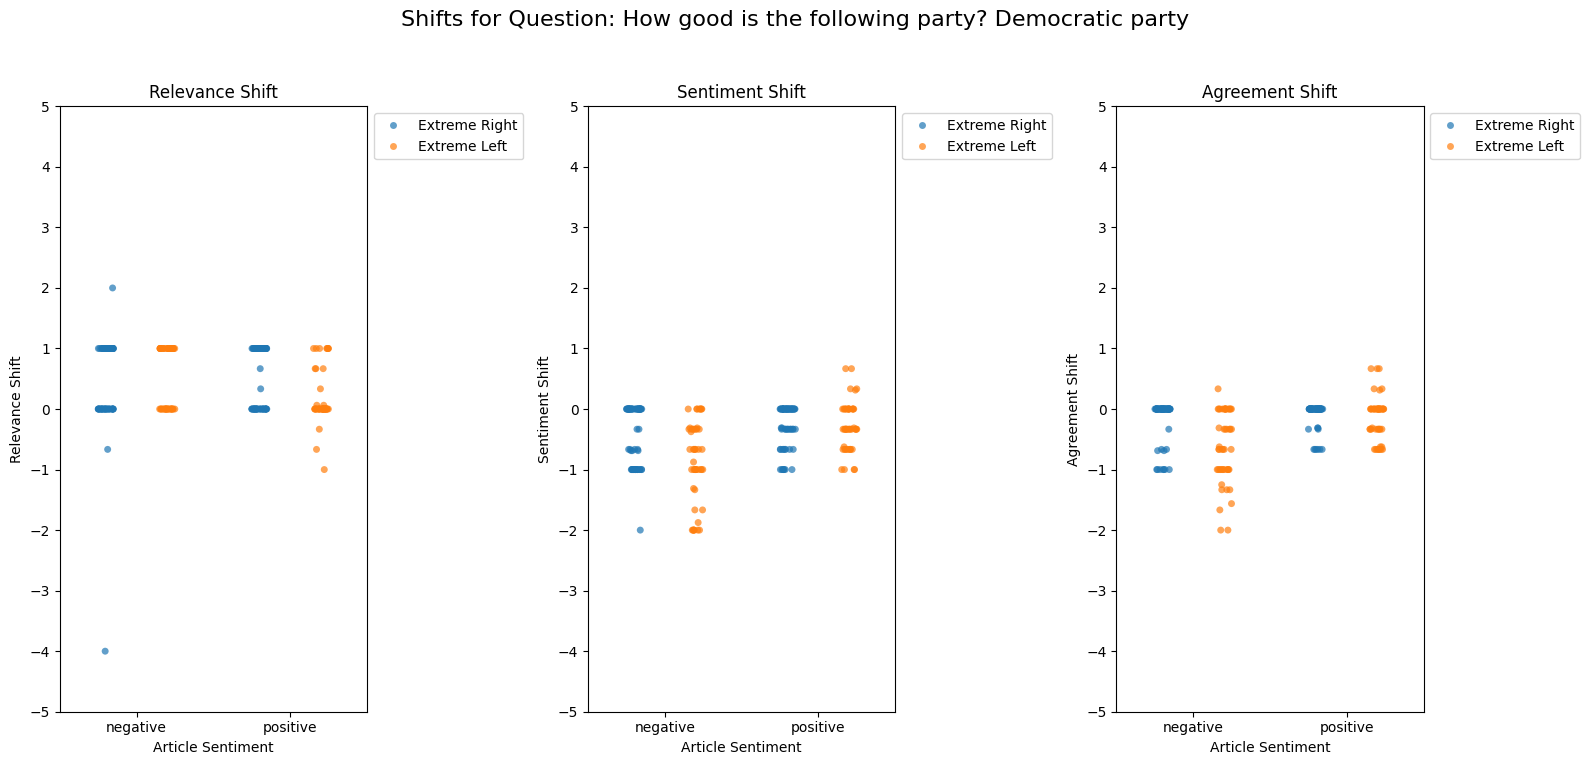

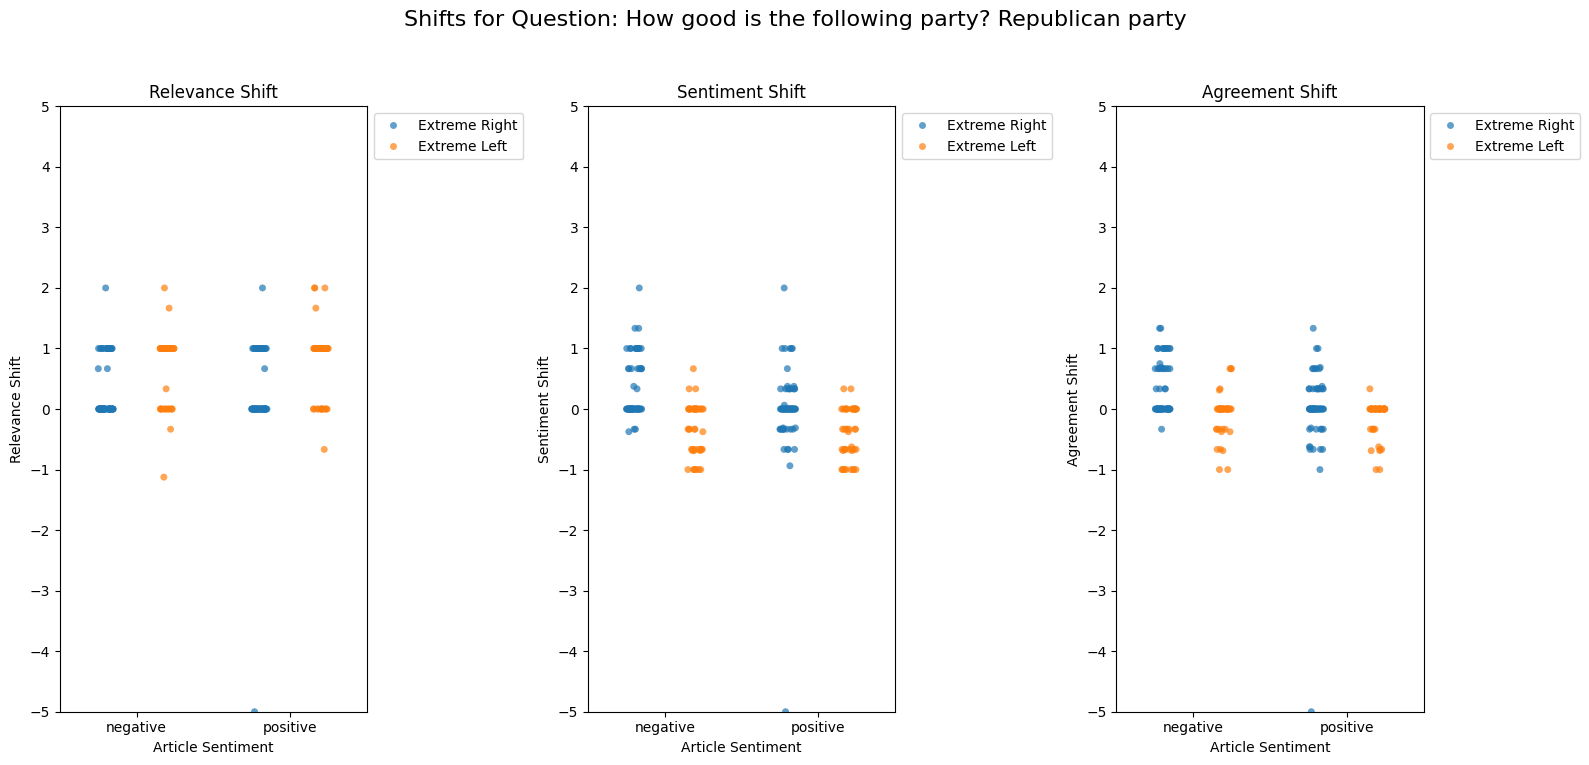

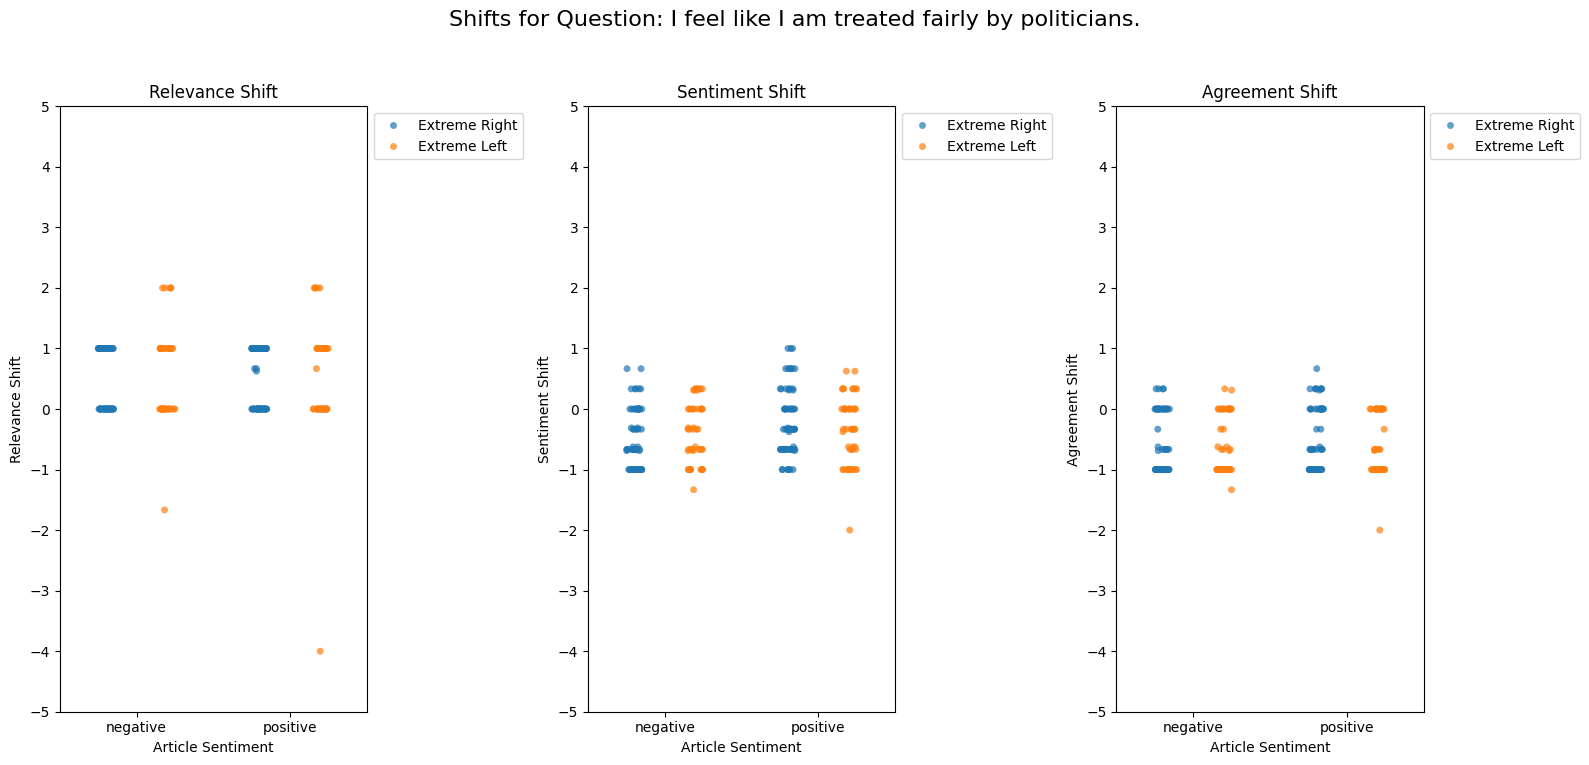

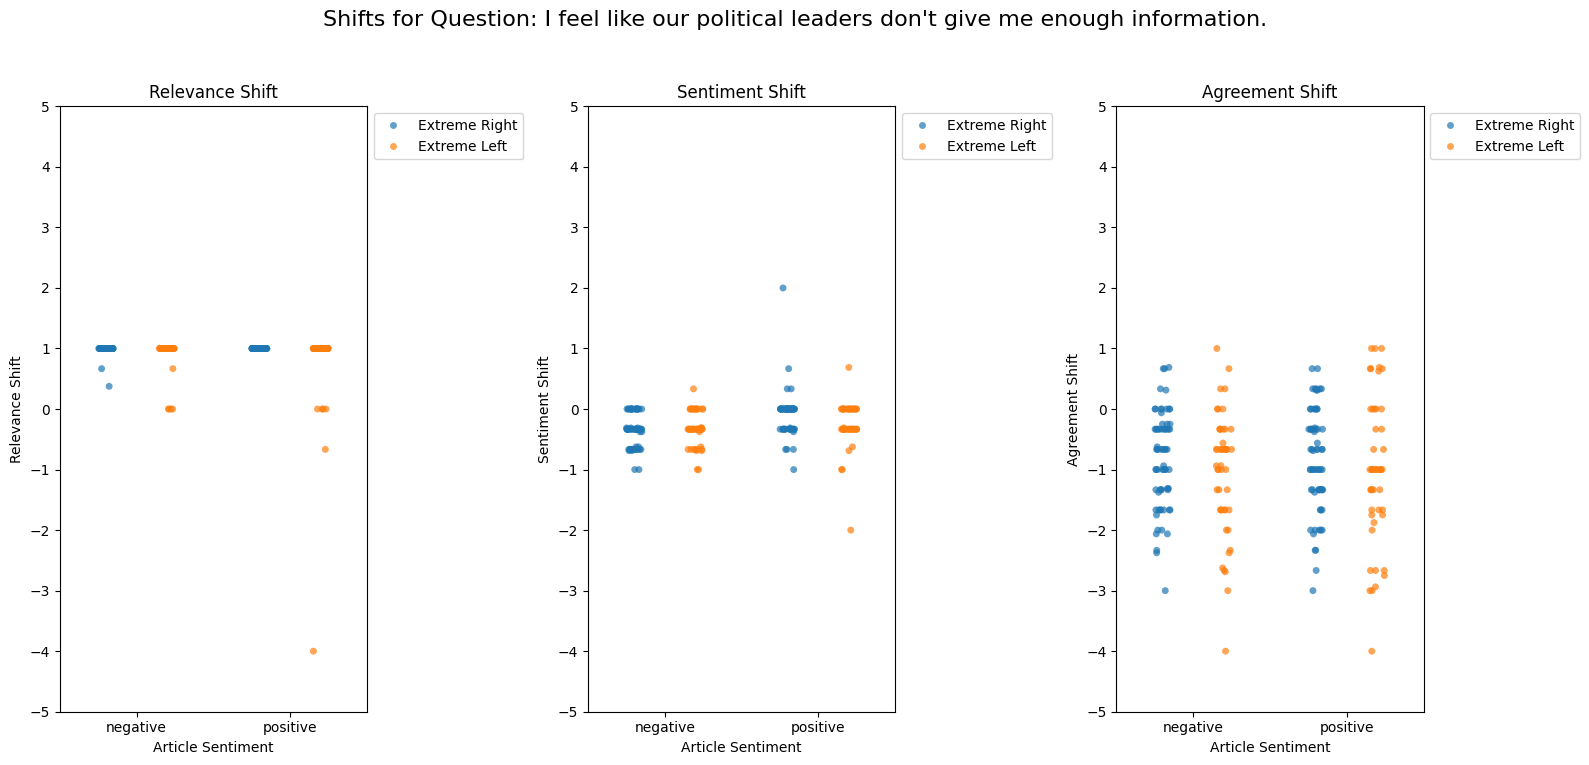

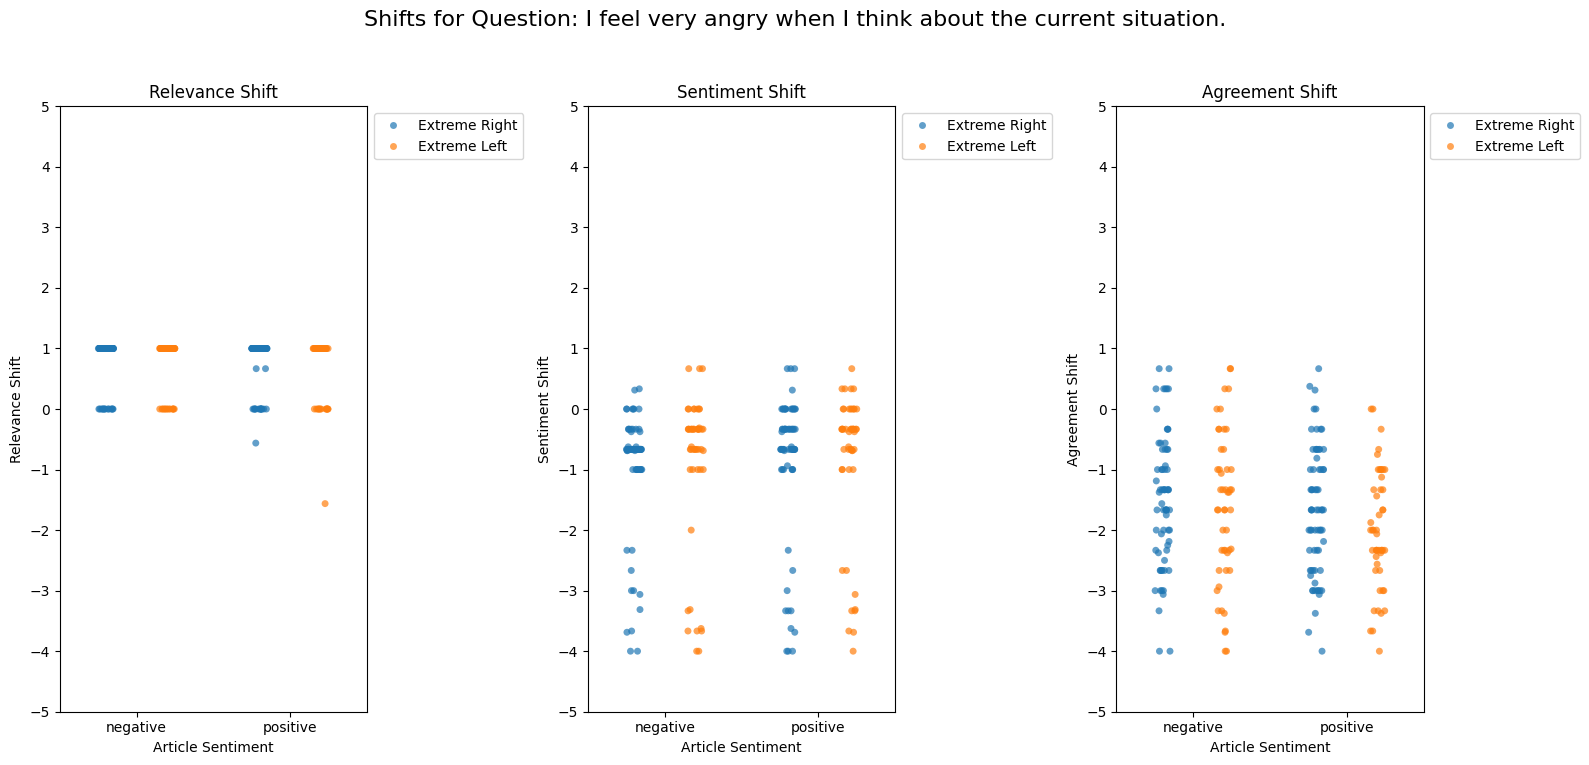

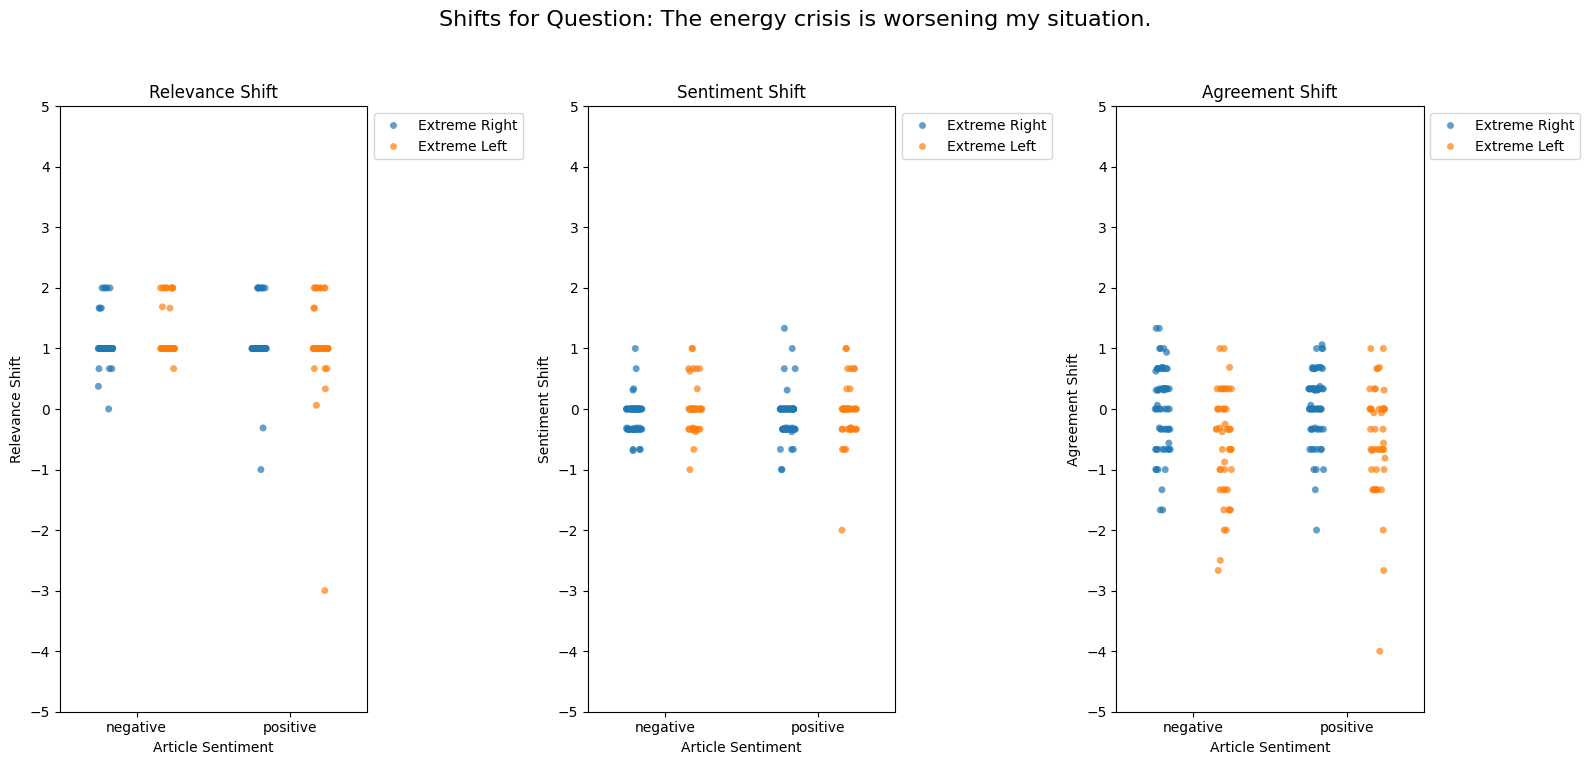

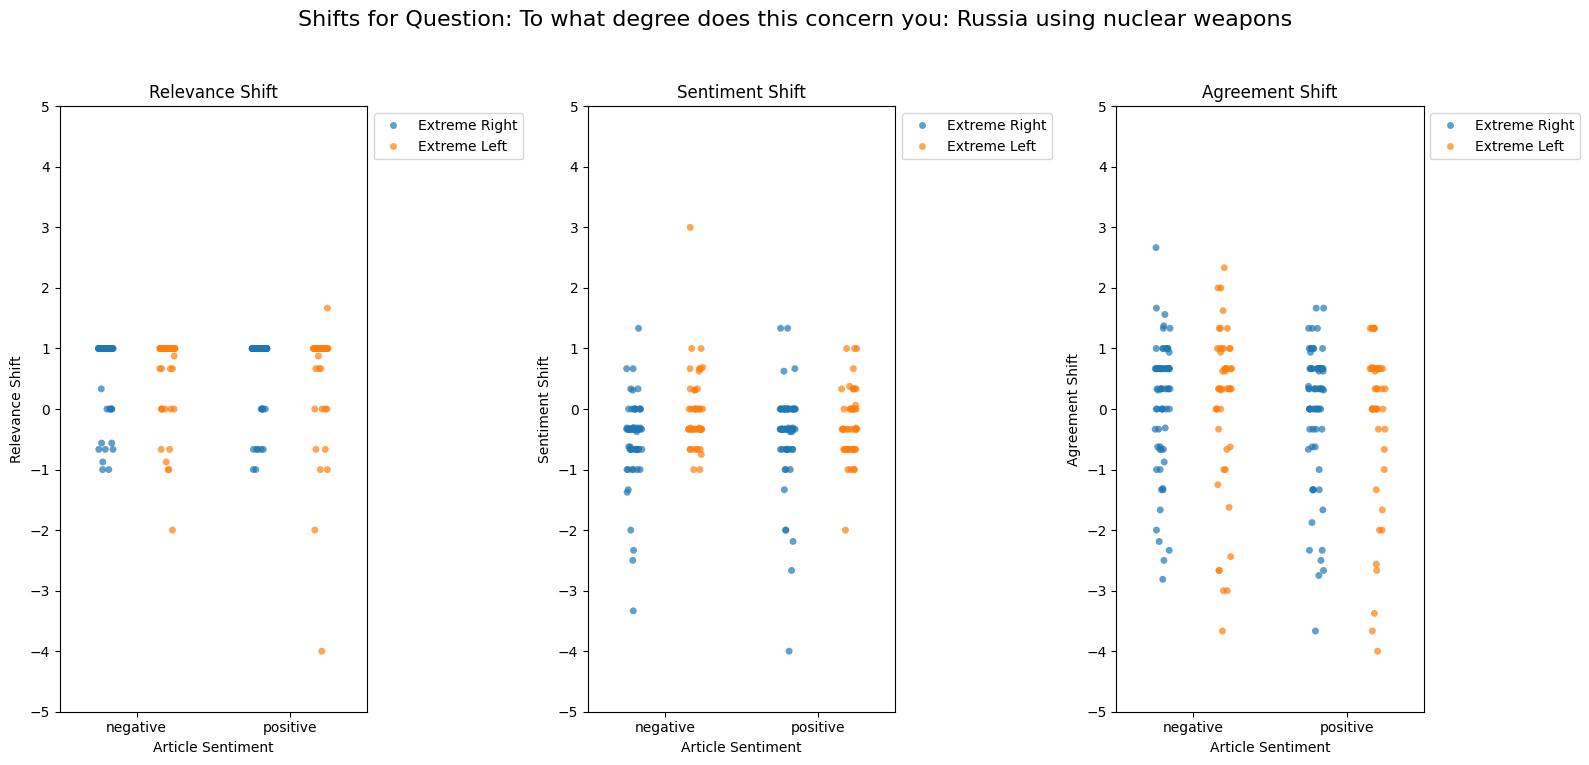

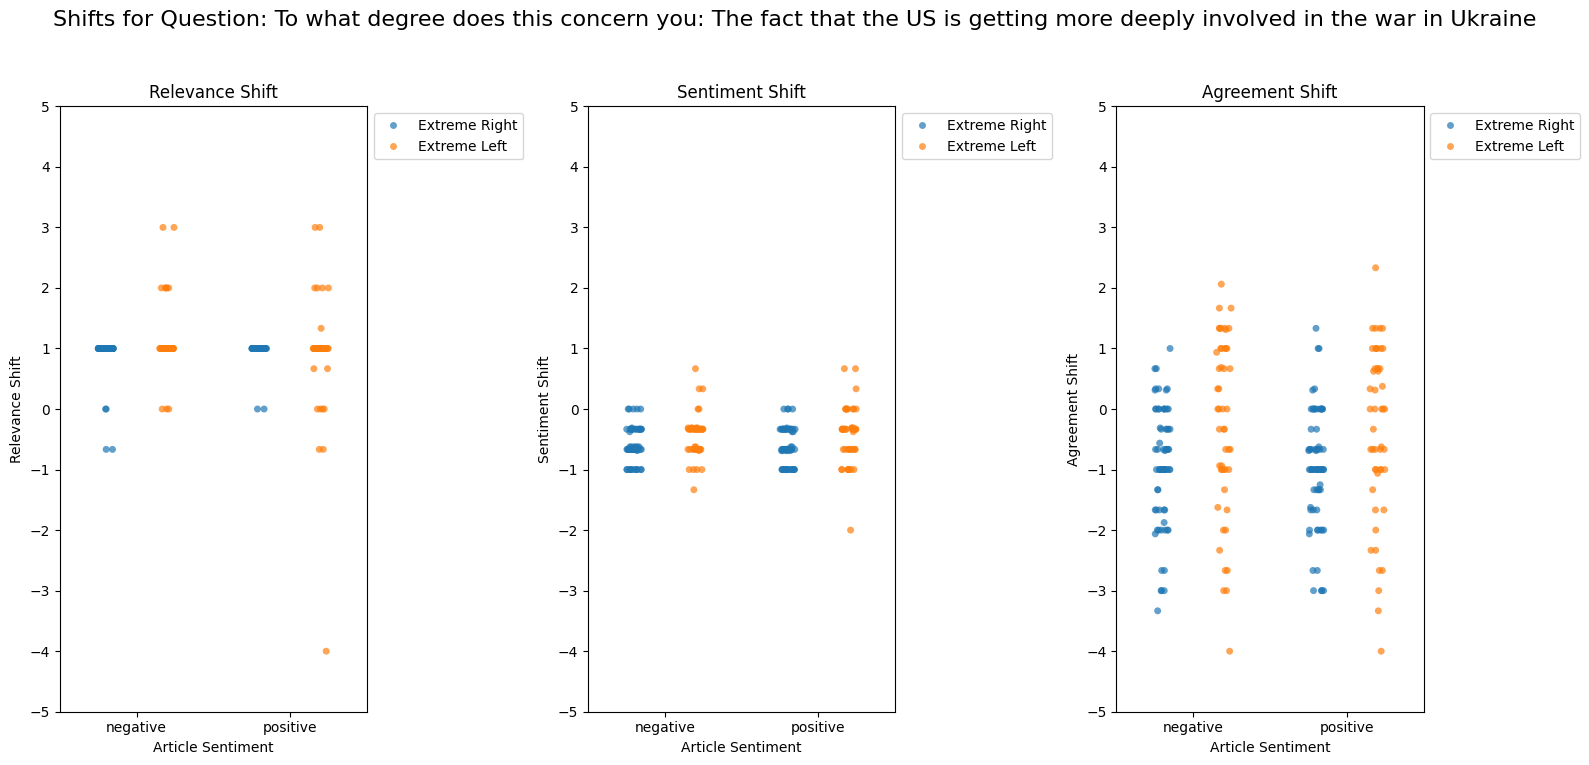

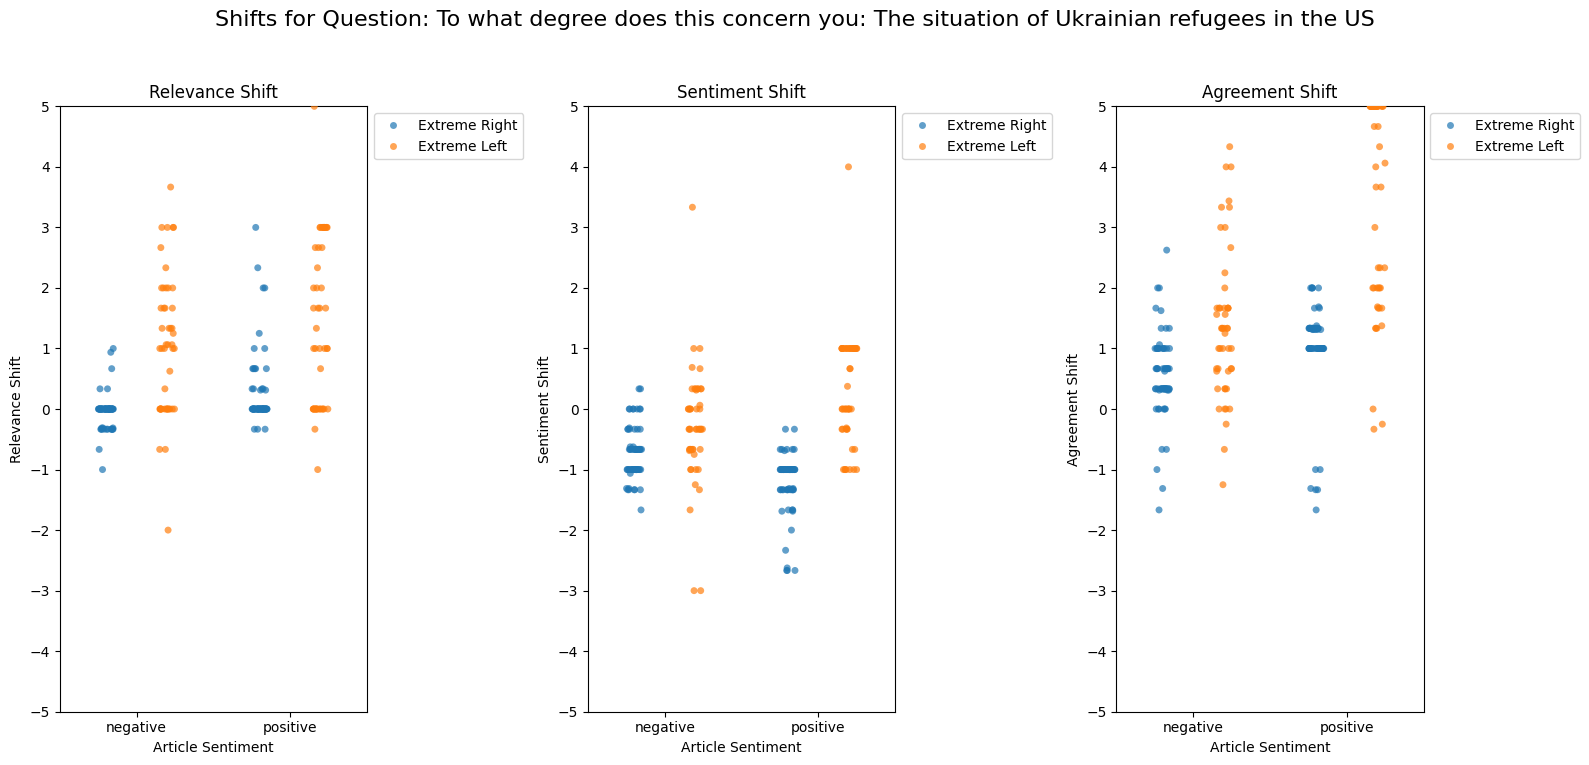

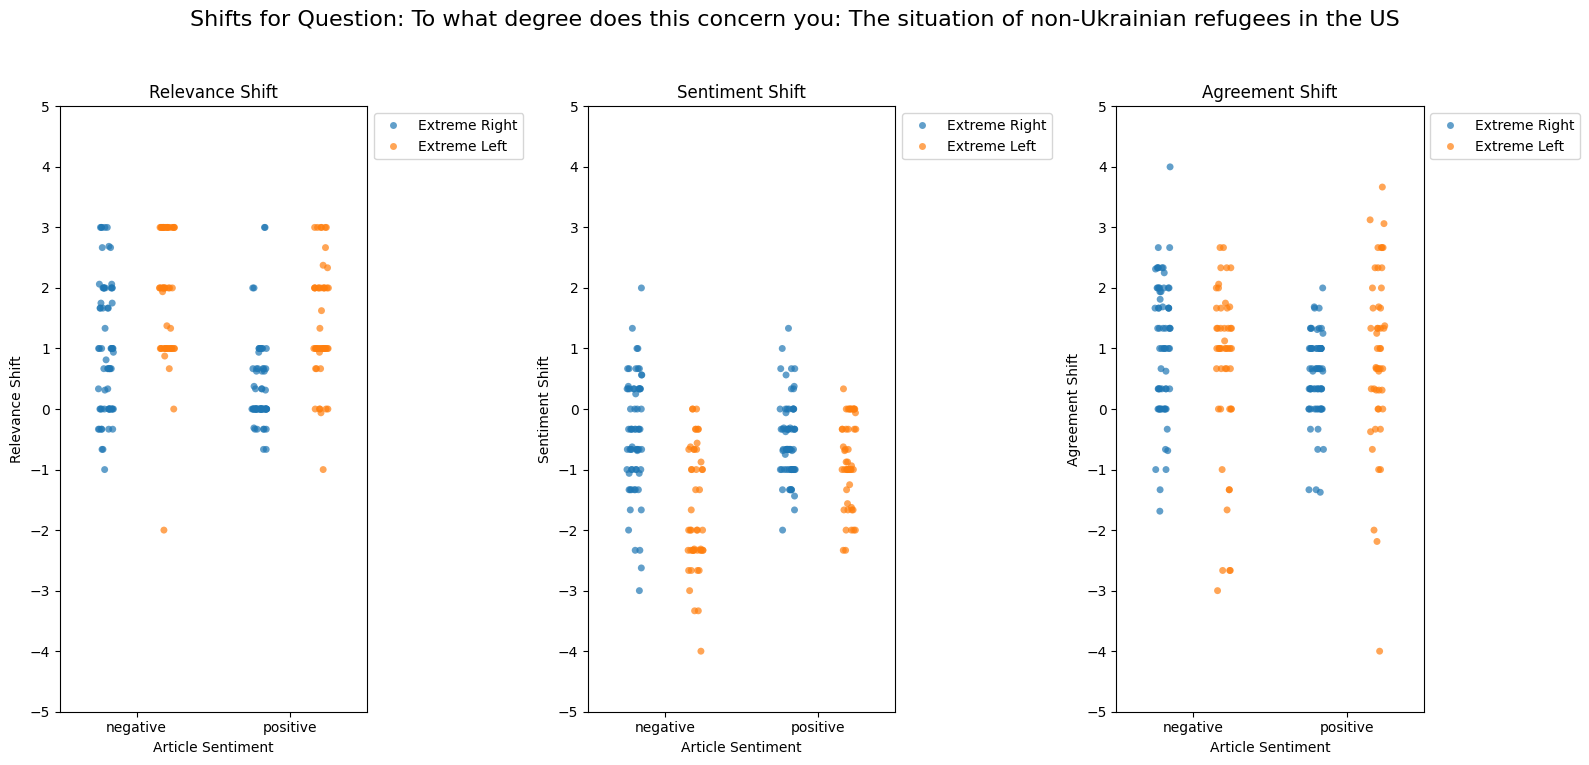

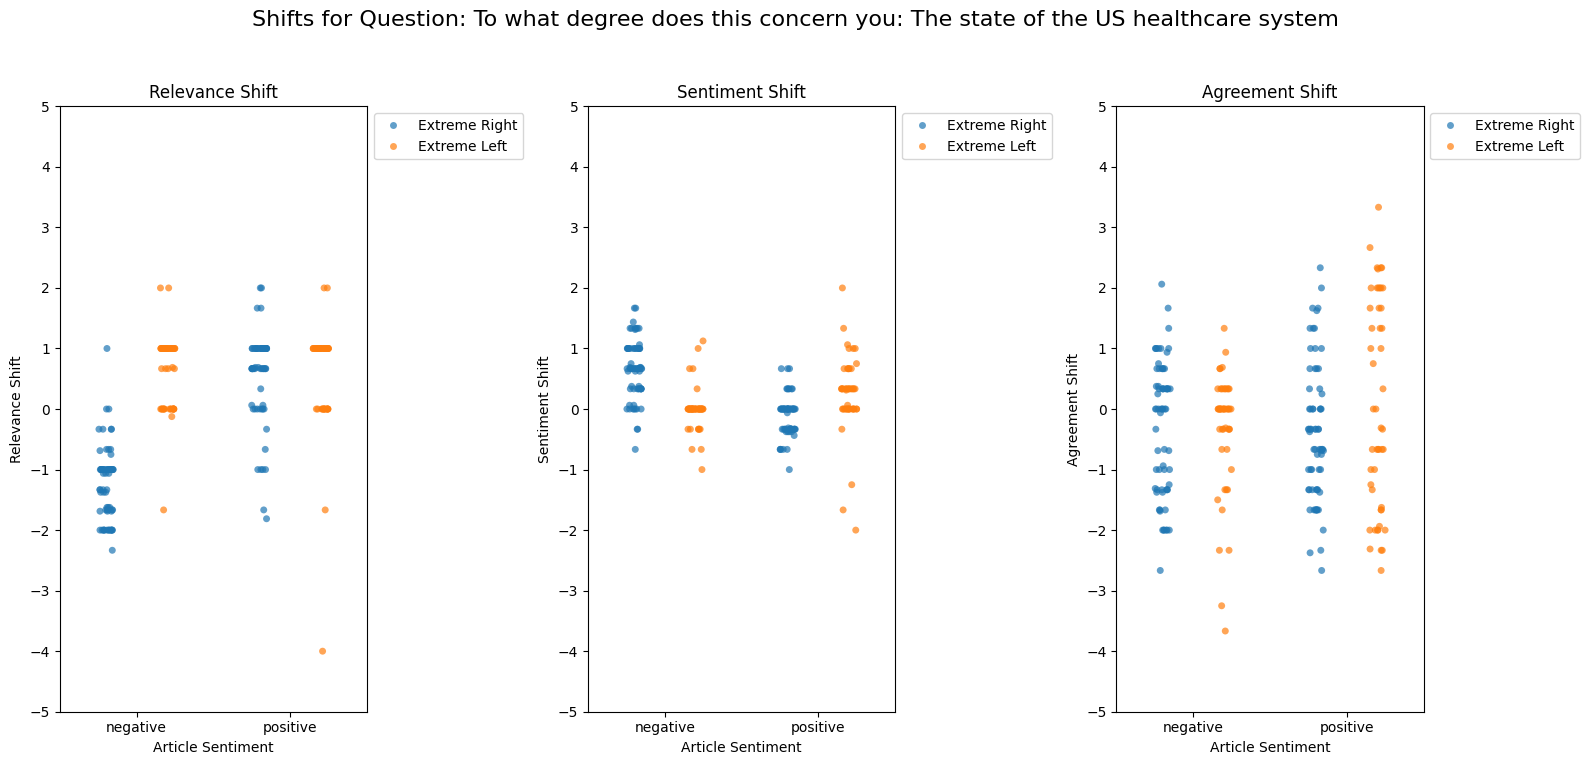

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate the shifts for each persona and question by article sentiment
agg_df = merged_df.groupby(['user_id', 'question', 'article_sentiment', 'Political Position']).agg({
    'relevance_shift': 'mean',
    'sentiment_shift': 'mean',
    'agreement_shift': 'mean'
}).reset_index()

# Strip Plot per Question: Show Aggregated Shifts
unique_questions = agg_df['question'].unique()

for question in unique_questions:
    question_df = agg_df[agg_df['question'] == question]
    
    plt.figure(figsize=(16, 8))
    plt.suptitle(f"Shifts for Question: {question}", fontsize=16)

    # Relevance Shift
    plt.subplot(1, 3, 1)
    sns.stripplot(data=question_df, x='article_sentiment', y='relevance_shift', hue='Political Position', dodge=True, jitter=True, alpha=0.7)
    plt.title("Relevance Shift")
    plt.xlabel("Article Sentiment")
    plt.ylabel("Relevance Shift")
    plt.ylim(-5, 5)
    plt.yticks(range(-5, 6))
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)  # Legend at top left

    # Sentiment Shift
    plt.subplot(1, 3, 2)
    sns.stripplot(data=question_df, x='article_sentiment', y='sentiment_shift', hue='Political Position', dodge=True, jitter=True, alpha=0.7)
    plt.title("Sentiment Shift")
    plt.xlabel("Article Sentiment")
    plt.ylabel("Sentiment Shift")
    plt.ylim(-5, 5)
    plt.yticks(range(-5, 6))
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)  # Legend at top left

    # Agreement Shift
    plt.subplot(1, 3, 3)
    sns.stripplot(data=question_df, x='article_sentiment', y='agreement_shift', hue='Political Position', dodge=True, jitter=True, alpha=0.7)
    plt.title("Agreement Shift")
    plt.xlabel("Article Sentiment")
    plt.ylabel("Agreement Shift")
    plt.ylim(-5, 5)
    plt.yticks(range(-5, 6))
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)  # Legend at top left
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


## General Comparison Between Before and After Responses

* Each question has a separate triple of subplots representing the distribution of responses for the left and right wing agents, respectively.
* The graph serves as a bird-eye view of the difference between the responses before and after having been exposed to an article (no matter its sentiment)


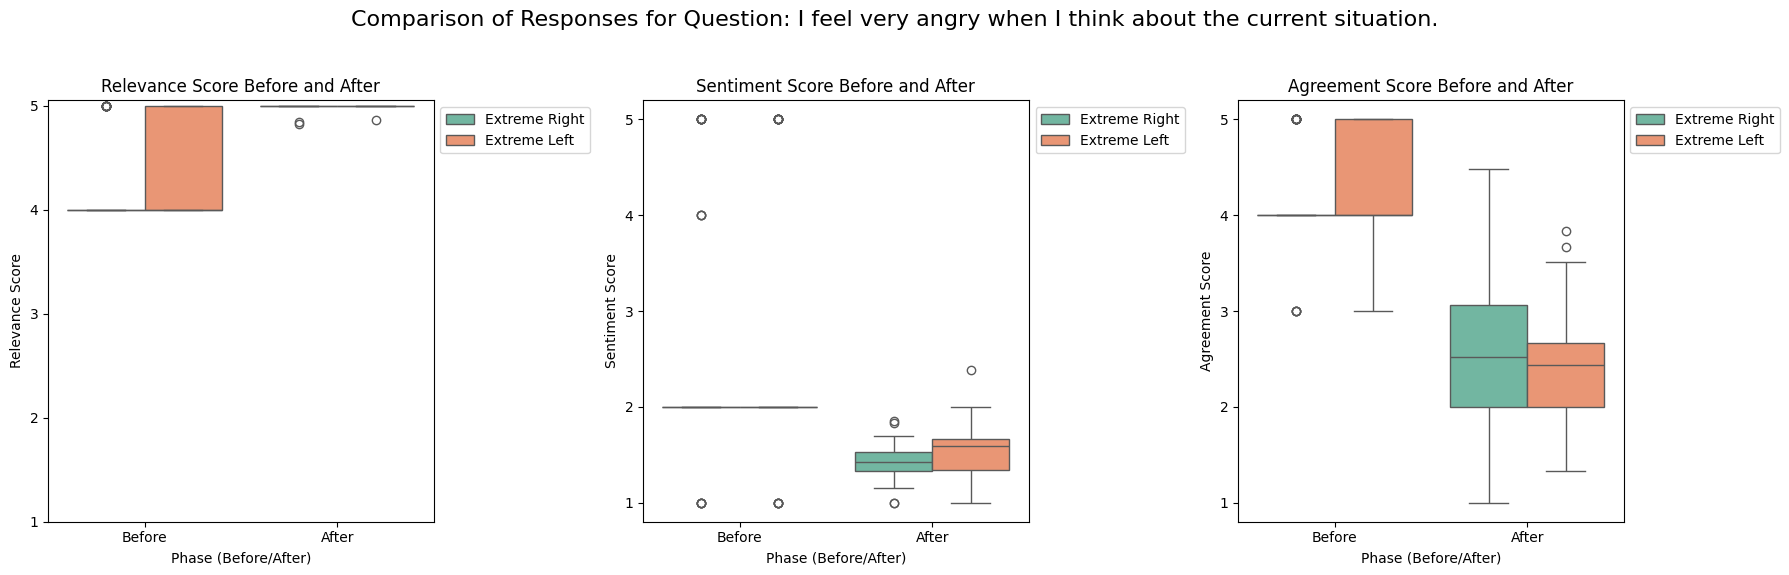

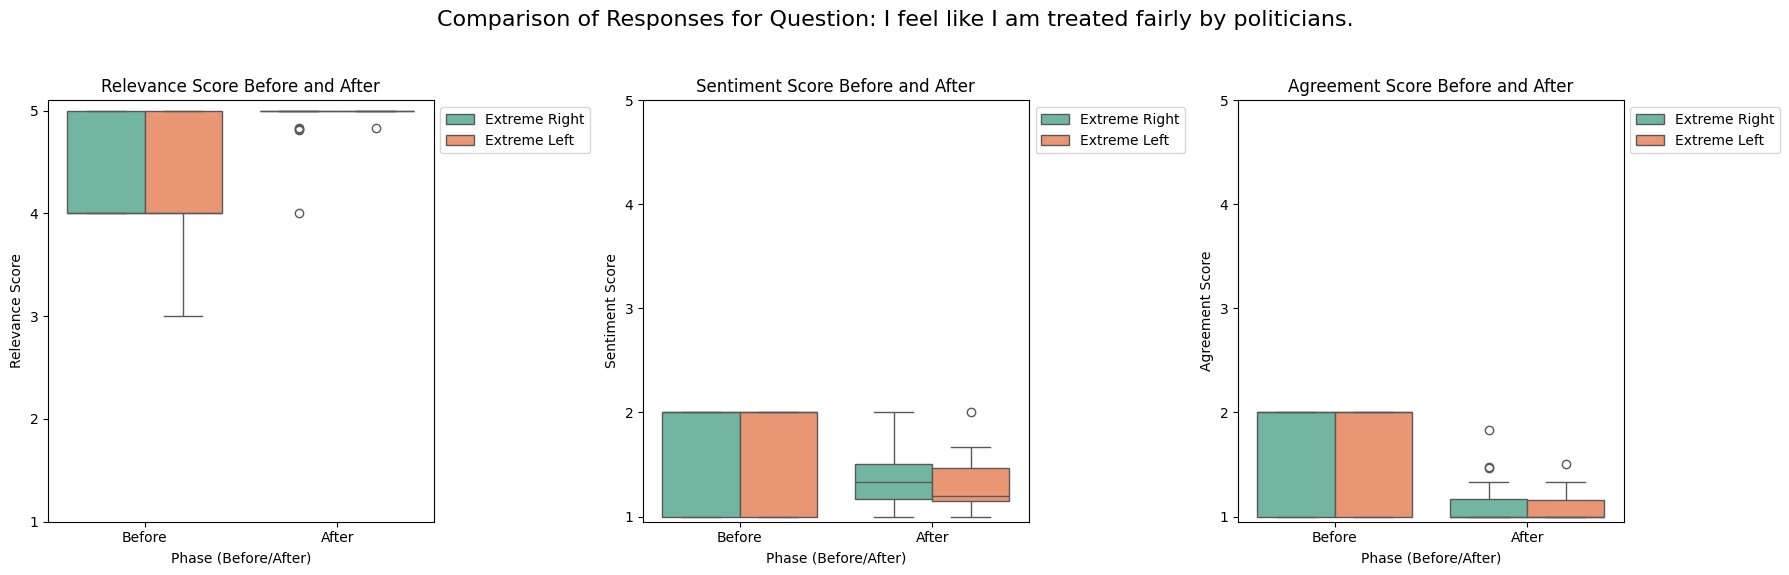

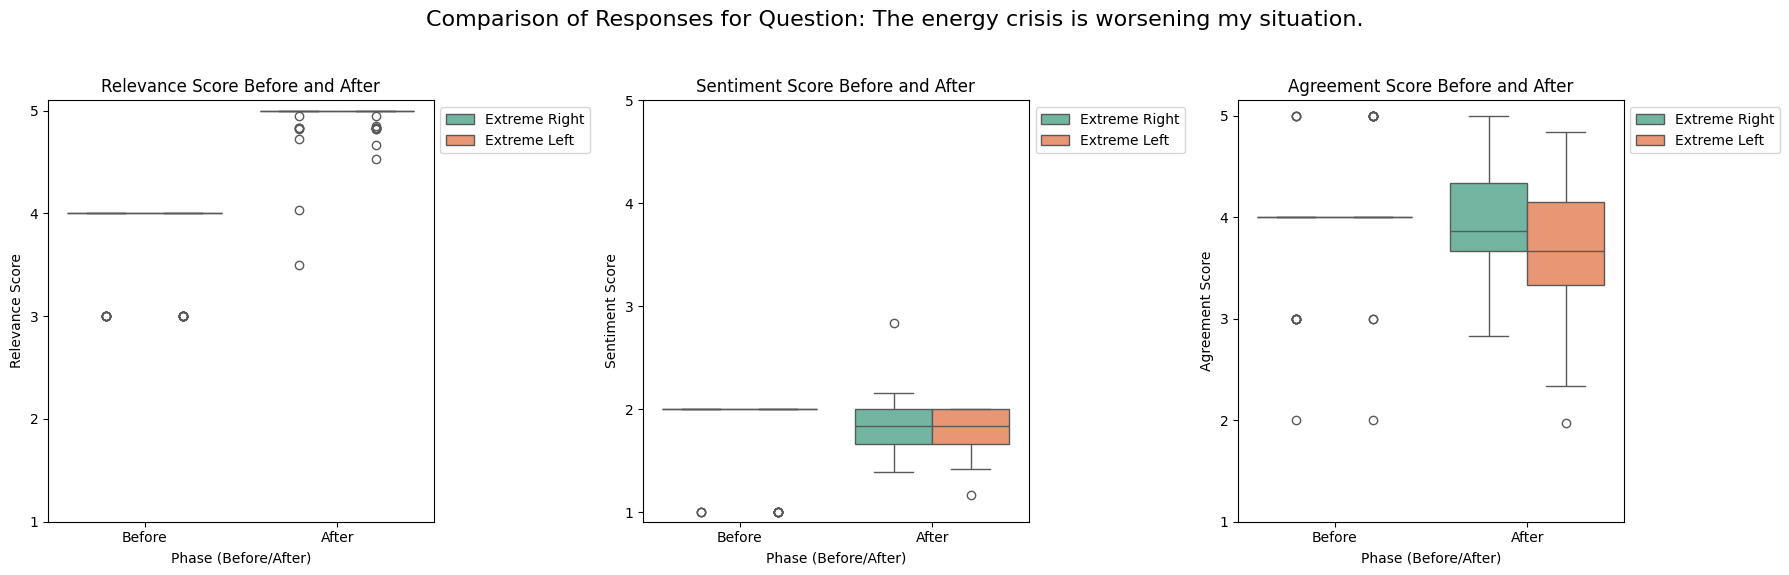

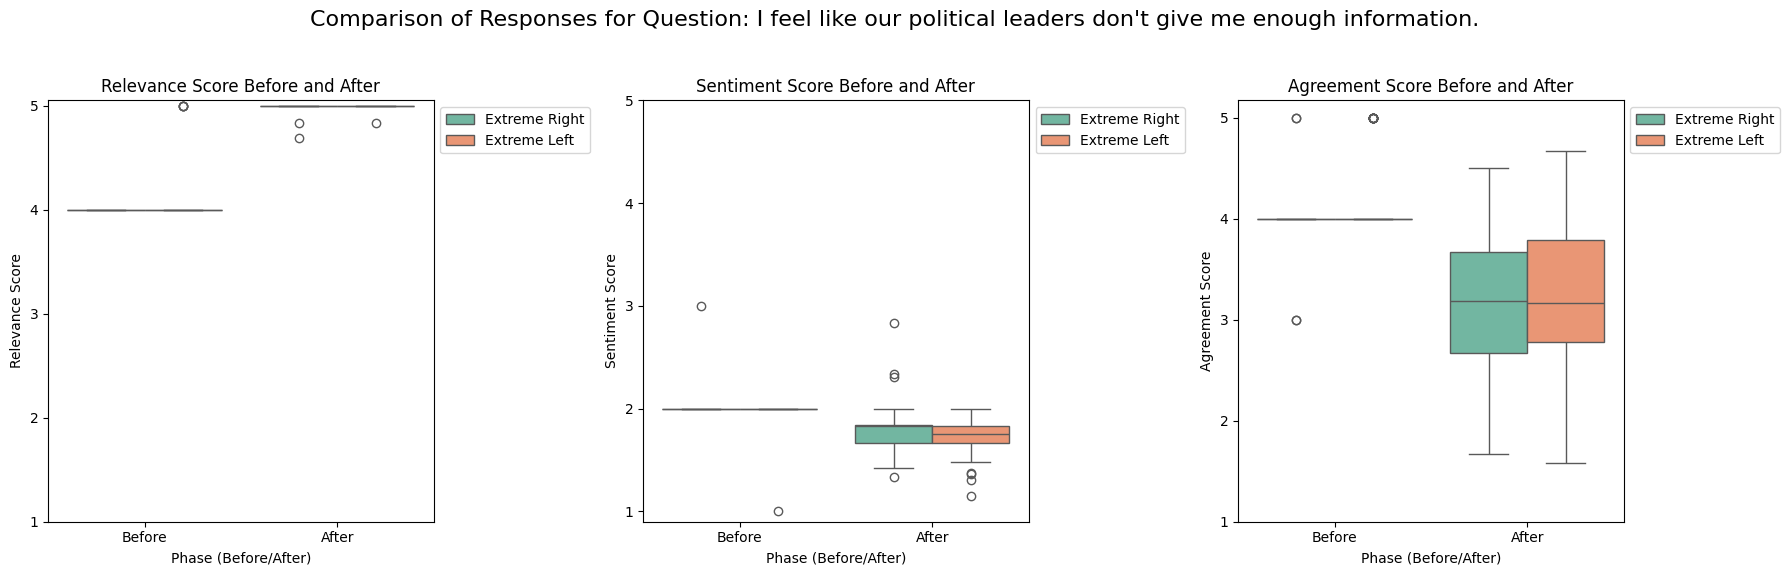

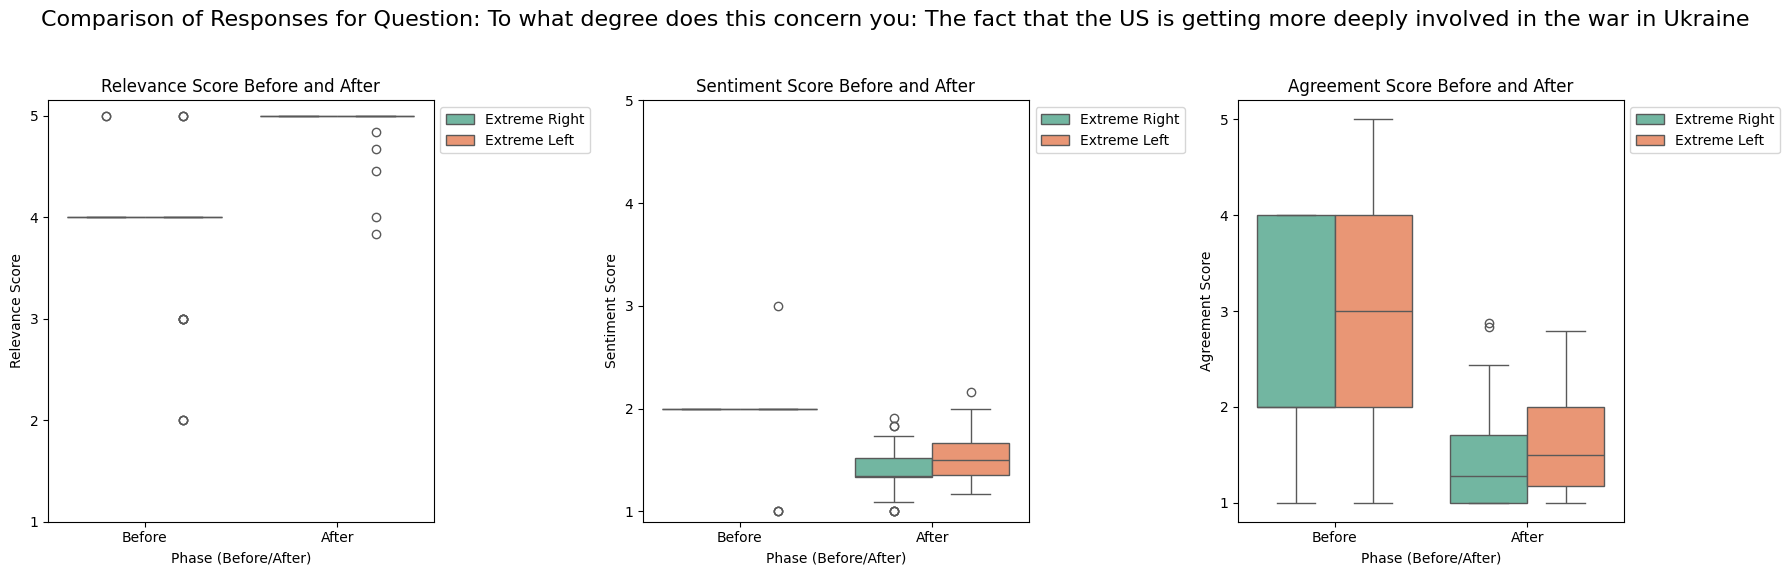

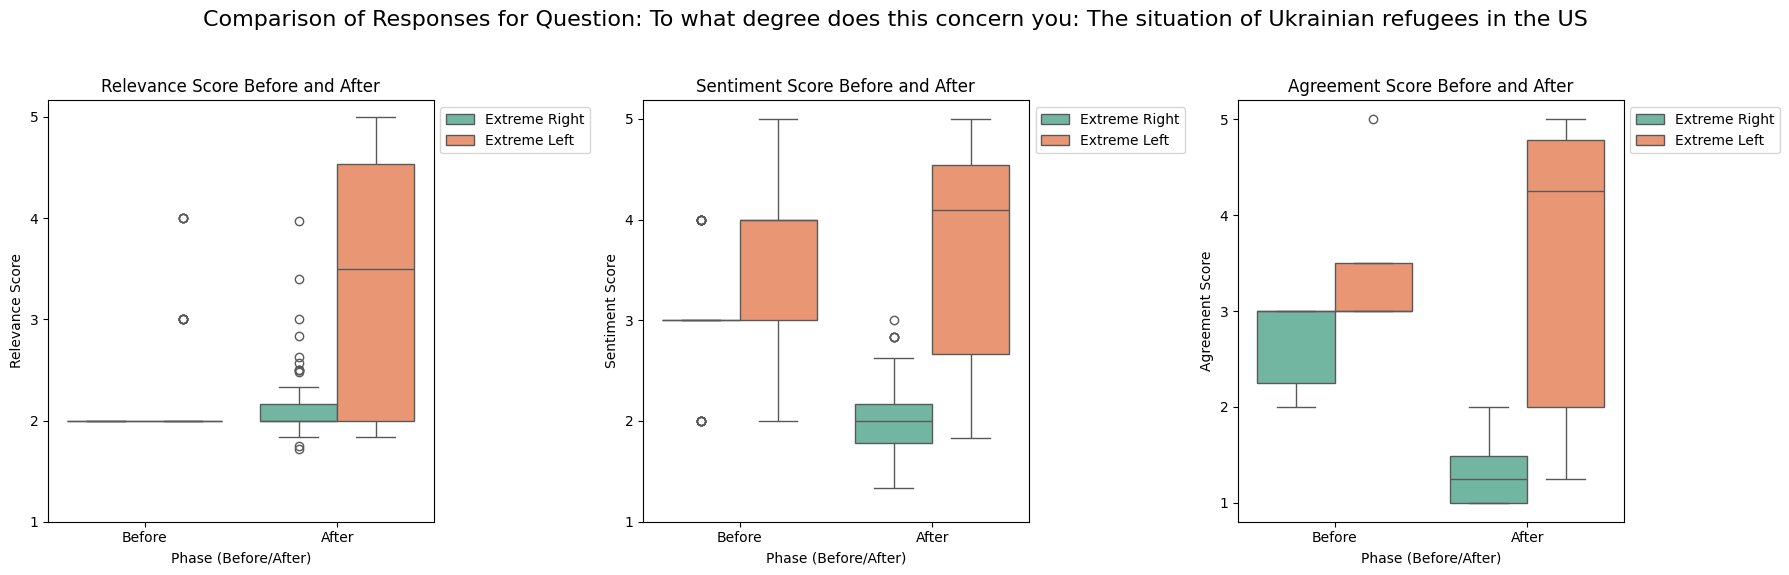

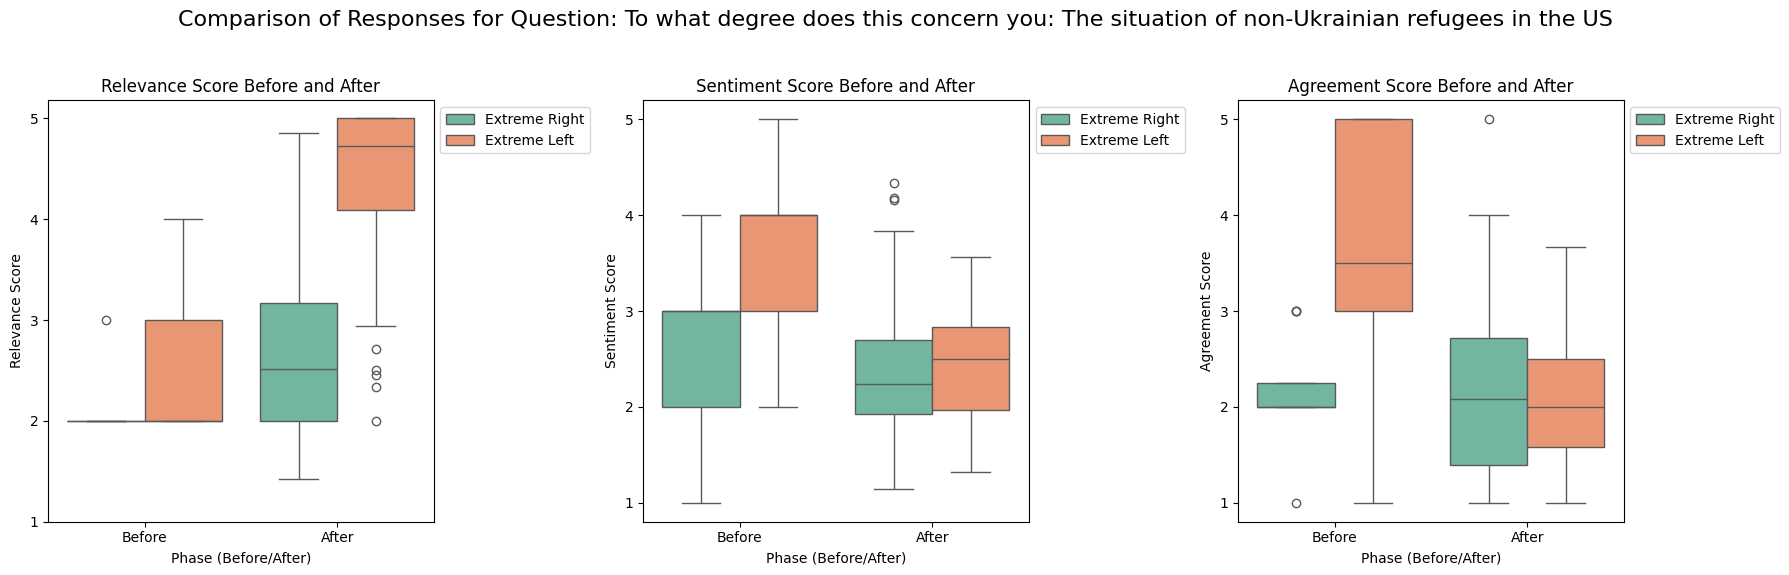

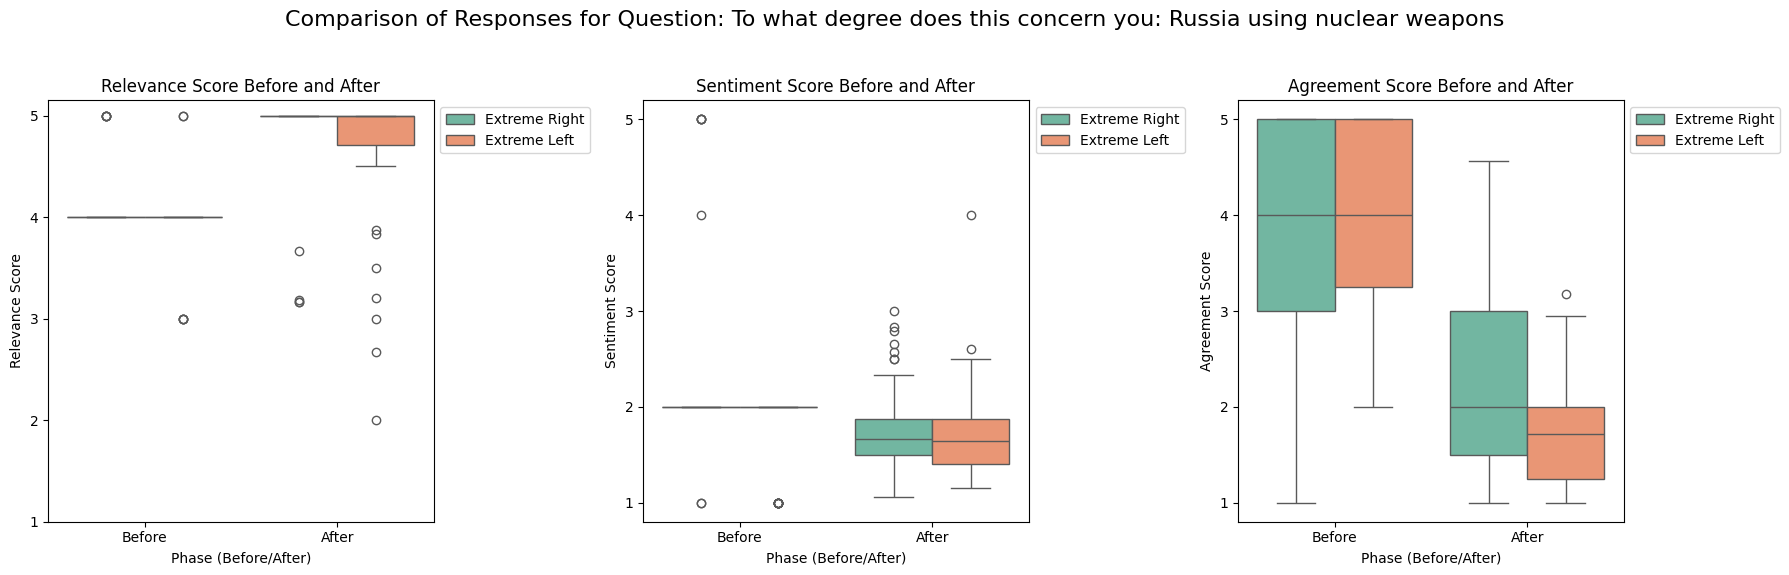

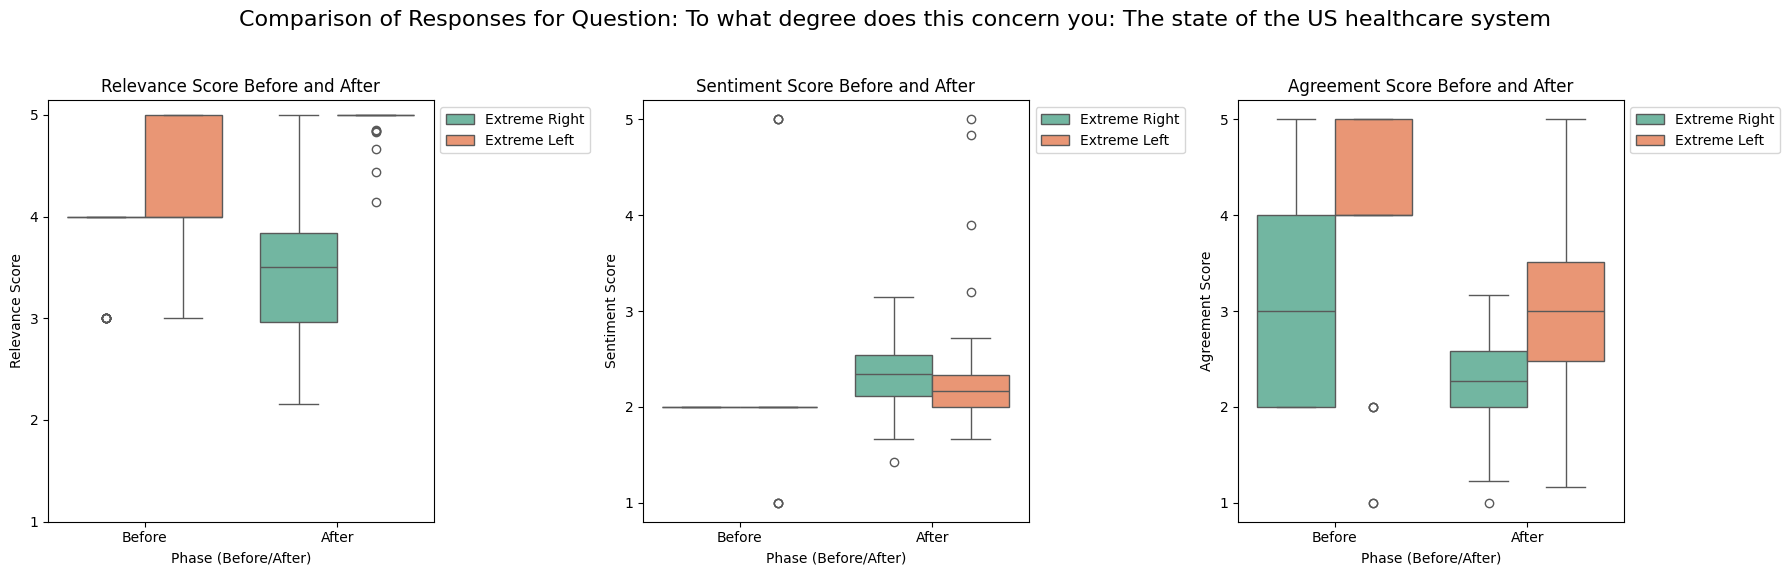

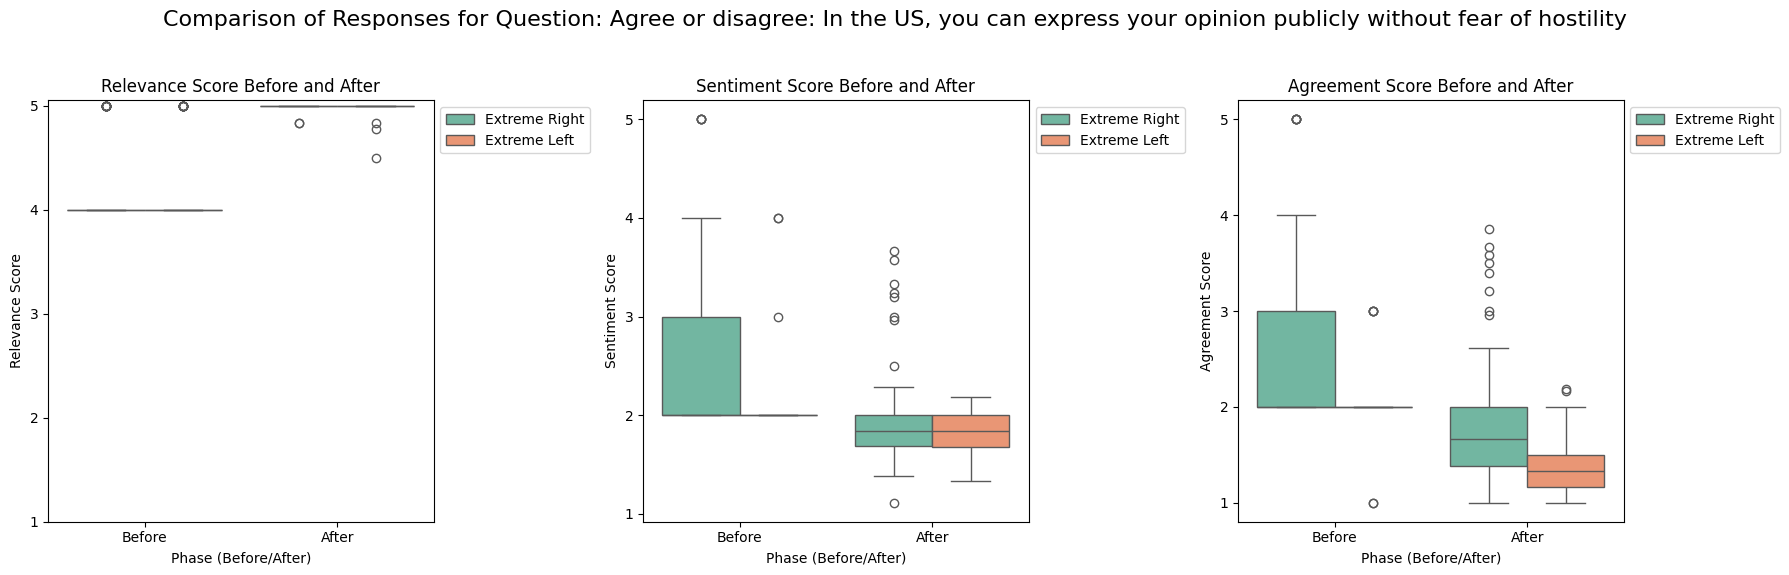

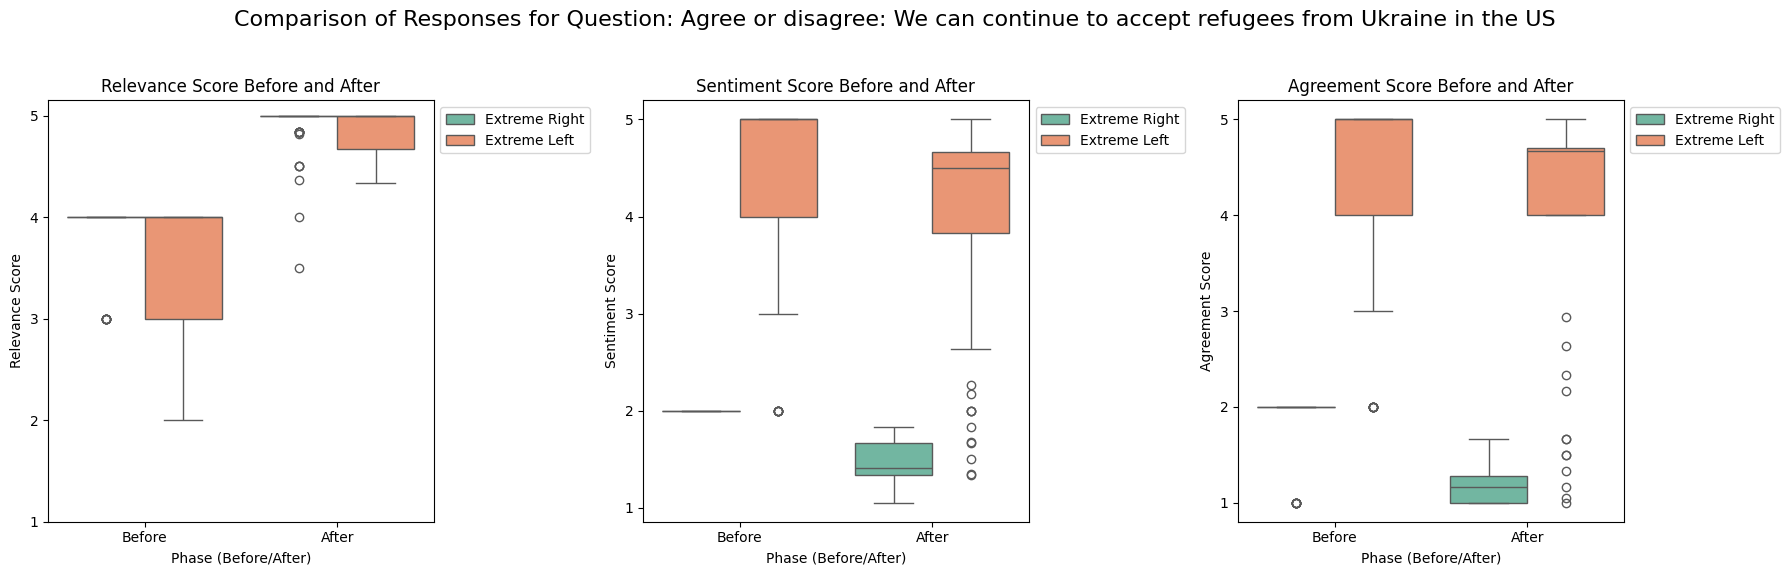

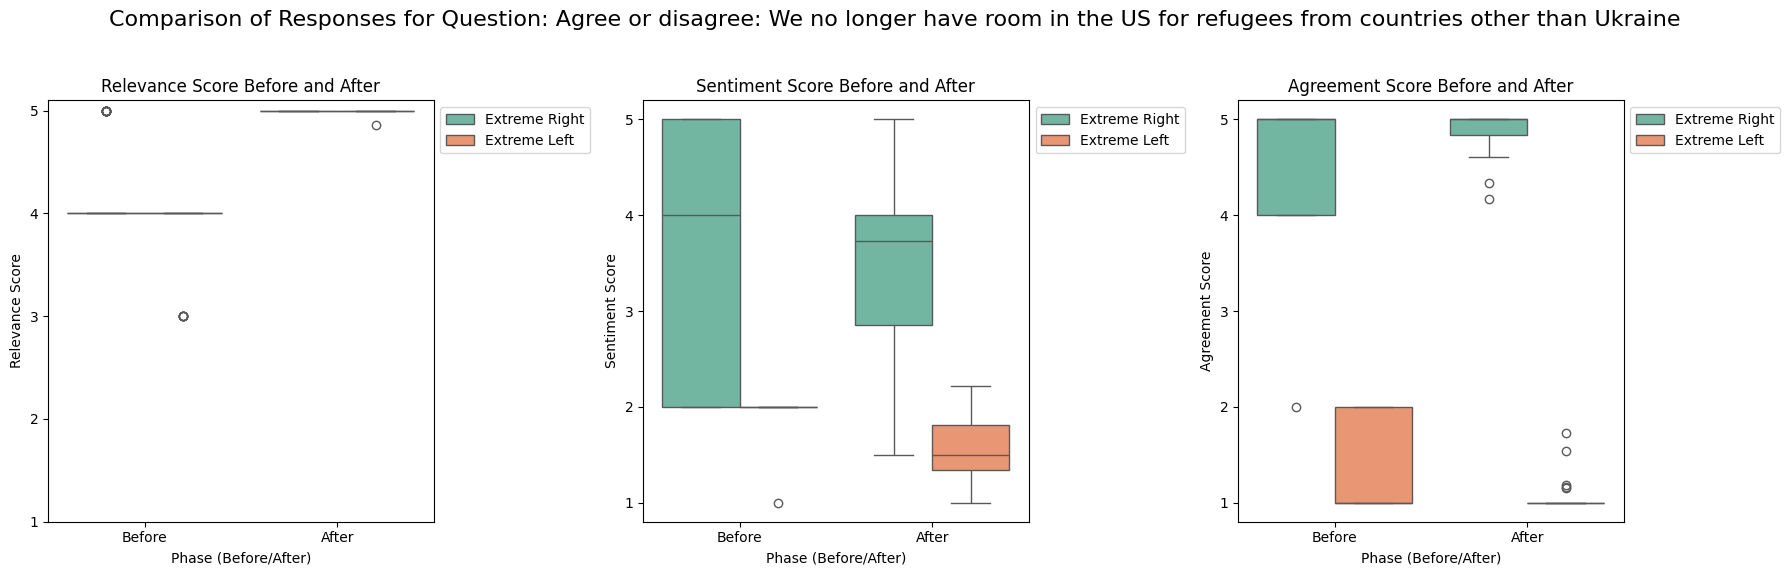

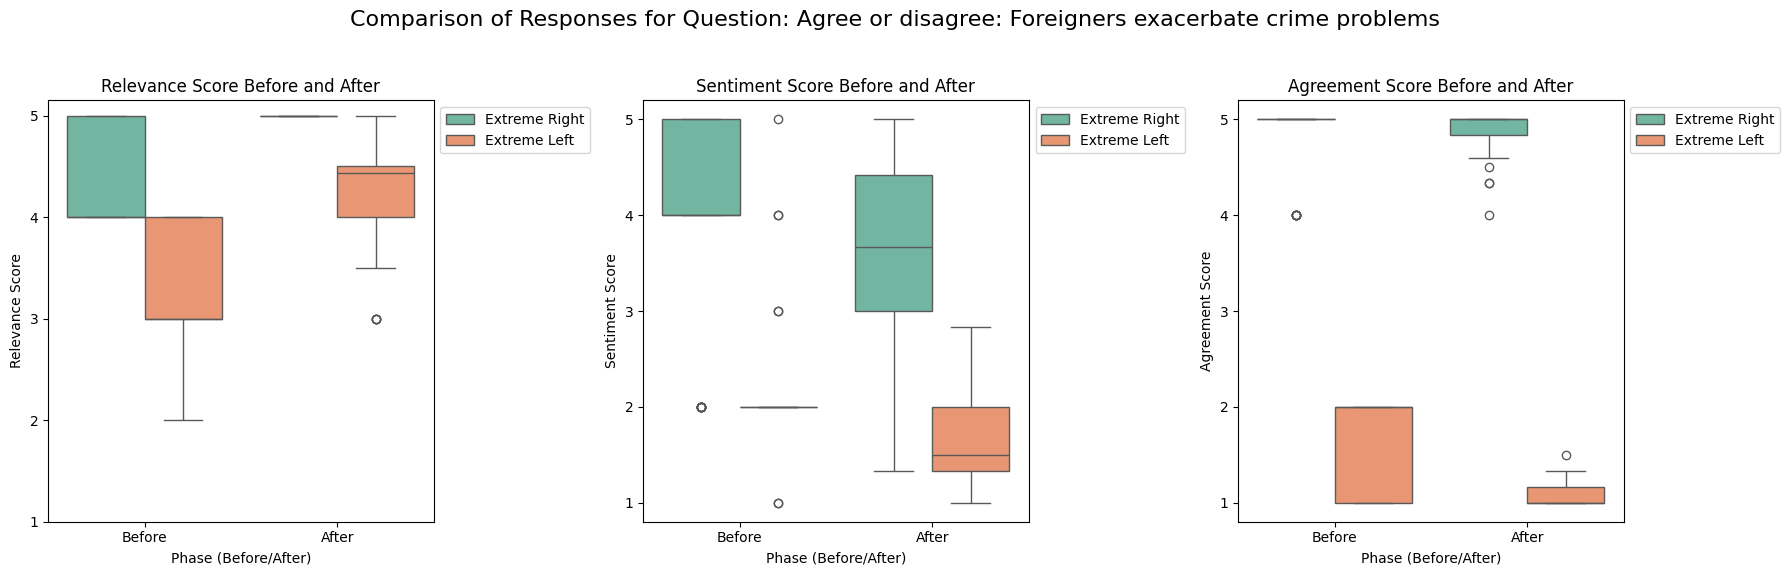

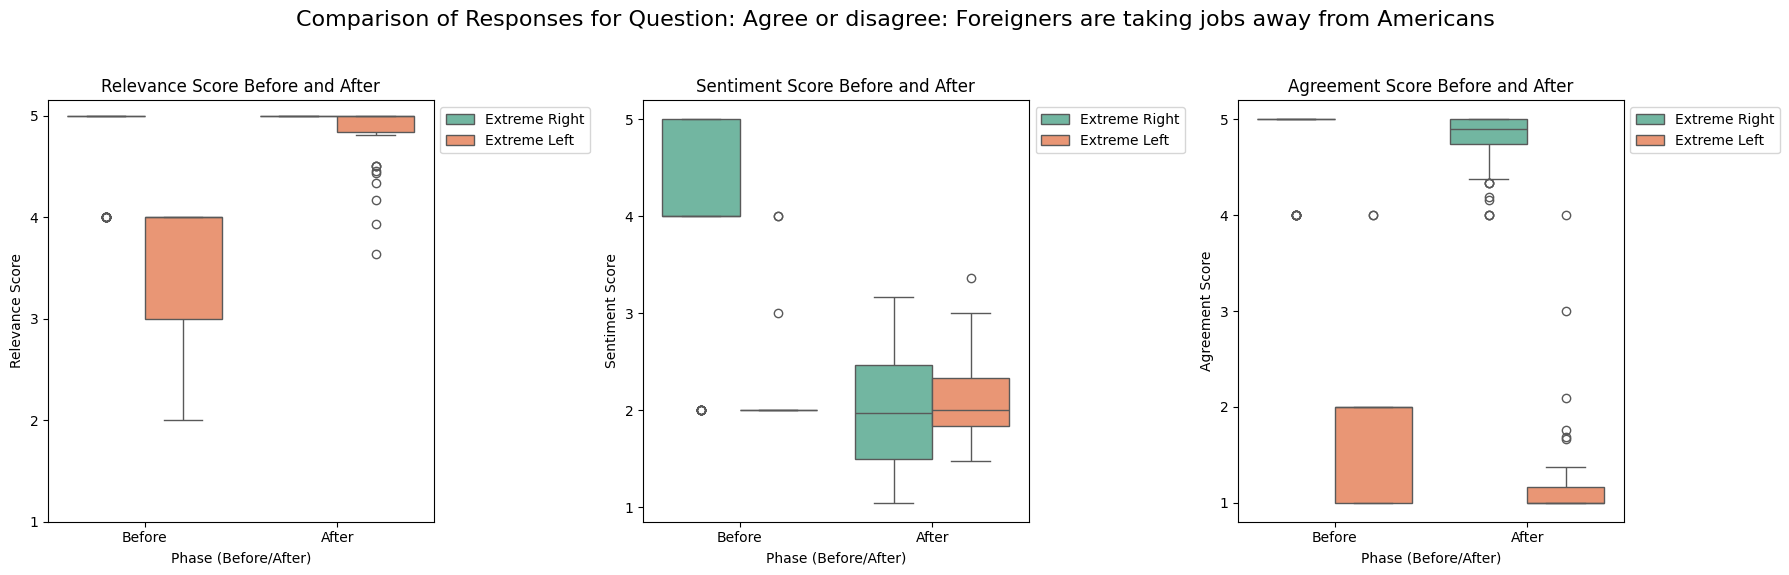

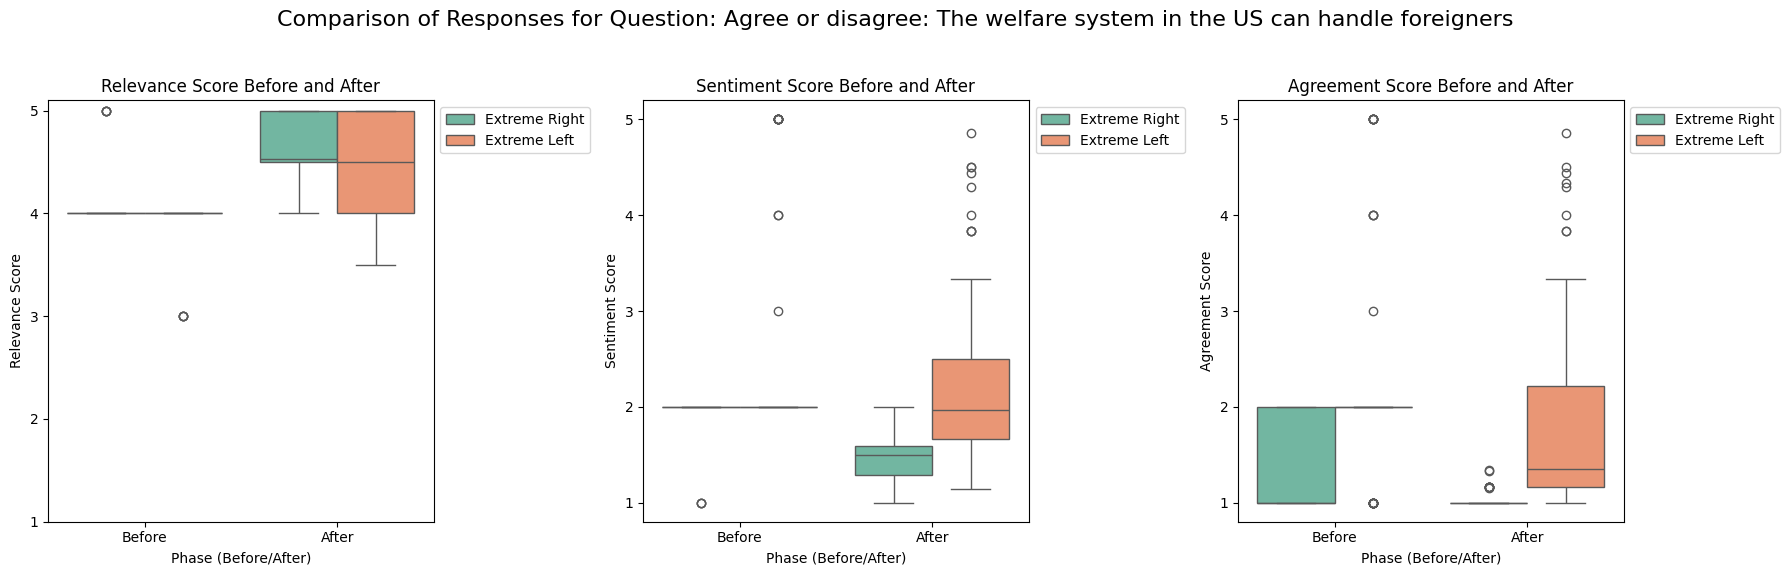

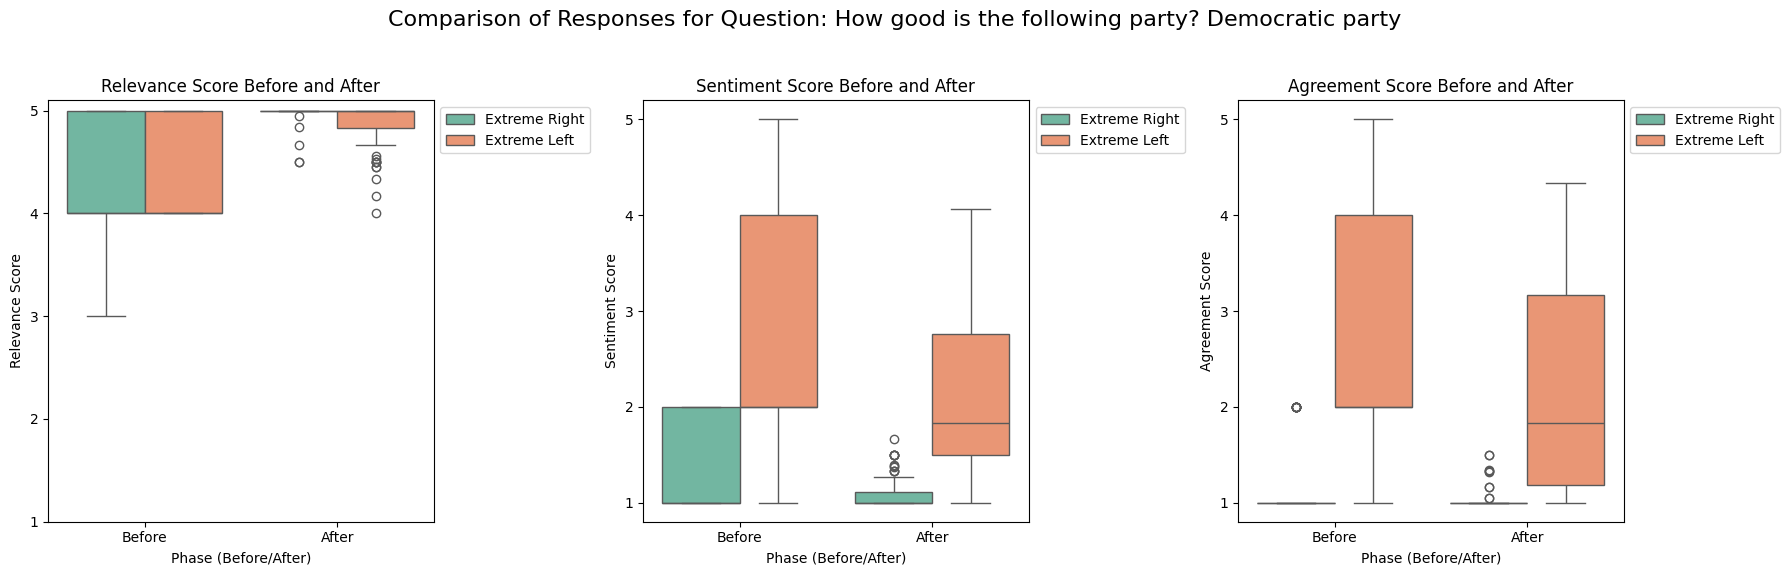

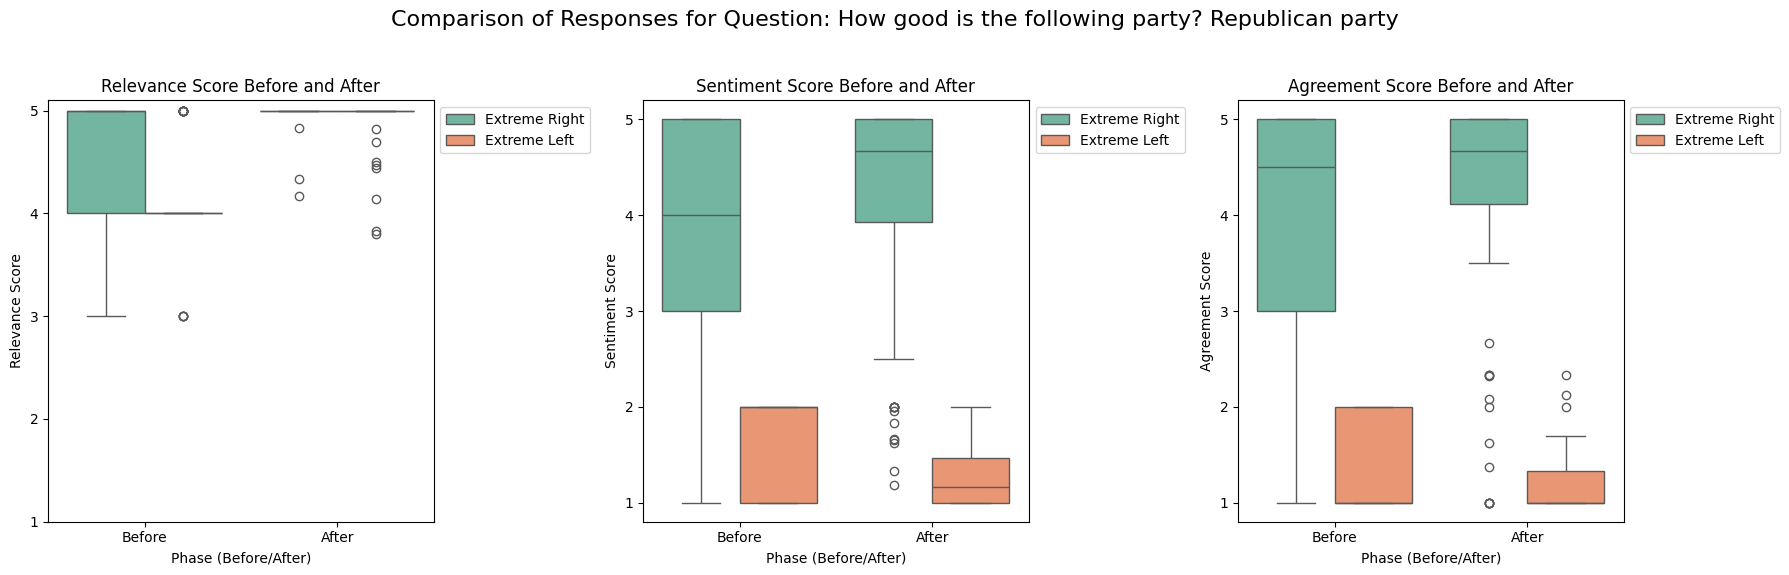

In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Load the original responses (before exposure)
with open('../data/processed/before_responses.json', 'r') as f:
    before_data = json.load(f)

# Convert the JSON data into a DataFrame
before_df = pd.json_normalize(before_data)

# Rename columns for consistency
before_df.rename(columns={
    'response.relevance': 'relevance_before',
    'response.sentiment': 'sentiment_before',
    'response.agreement': 'agreement_before'
}, inplace=True)

# Drop unnecessary columns
before_df = before_df[['user_id', 'question', 'relevance_before', 'sentiment_before', 'agreement_before']]

# Ensure that all 'before' columns are numeric
before_df['relevance_before'] = pd.to_numeric(before_df['relevance_before'], errors='coerce')
before_df['sentiment_before'] = pd.to_numeric(before_df['sentiment_before'], errors='coerce')
before_df['agreement_before'] = pd.to_numeric(before_df['agreement_before'], errors='coerce')

# Load the after responses
with open('../data/processed/after_responses.json', 'r') as f:
    after_data = json.load(f)

# Convert the JSON data into a DataFrame
after_df = pd.json_normalize(after_data)

# Rename columns for consistency
after_df.rename(columns={
    'response.relevance': 'relevance_after',
    'response.sentiment': 'sentiment_after',
    'response.agreement': 'agreement_after'
}, inplace=True)

# Convert 'N/A' to NaN and ensure numeric types
after_df['relevance_after'] = pd.to_numeric(after_df['relevance_after'], errors='coerce')
after_df['sentiment_after'] = pd.to_numeric(after_df['sentiment_after'], errors='coerce')
after_df['agreement_after'] = pd.to_numeric(after_df['agreement_after'], errors='coerce')

# Aggregate the after responses per persona and question
agg_after_df = after_df.groupby(['user_id', 'question']).agg({
    'relevance_after': 'mean',
    'sentiment_after': 'mean',
    'agreement_after': 'mean'
}).reset_index()

# Merge the before responses with the aggregated after responses on 'user_id' and 'question'
merged_df = pd.merge(before_df, agg_after_df, on=['user_id', 'question'], how='left')

# Load the persona data to get the political positions
persona_df = pd.read_csv("../data/processed/combined_data.csv")

# Clean persona data: Combine "Far Left" and "Extreme Left" into "Extreme Left"
persona_df['Where would you place your own political position?'] = persona_df['Where would you place your own political position?'].replace({'Far Left': 'Extreme Left'})

# Merge the persona data with the merged responses
merged_df = pd.merge(merged_df, persona_df[['user', 'Where would you place your own political position?']], left_on='user_id', right_on='user', how='left')

# Melt the DataFrame to have a long format for easier plotting
melted_df = merged_df.melt(id_vars=['user_id', 'question', 'Where would you place your own political position?'], 
                            value_vars=['relevance_before', 'relevance_after', 
                                        'sentiment_before', 'sentiment_after', 
                                        'agreement_before', 'agreement_after'],
                            var_name='phase', value_name='score')

# Extract metric and phase information
melted_df['metric'] = melted_df['phase'].apply(lambda x: x.split('_')[0])
melted_df['phase'] = melted_df['phase'].apply(lambda x: x.split('_')[1])

# Visualization: Boxplot per Metric Before and After Exposure for Each Question
unique_questions = melted_df['question'].unique()

for question in unique_questions:
    question_df = melted_df[melted_df['question'] == question]
    
    plt.figure(figsize=(18, 6))
    plt.suptitle(f"Comparison of Responses for Question: {question}", fontsize=16)

    for i, metric in enumerate(['relevance', 'sentiment', 'agreement'], 1):
        plt.subplot(1, 3, i)
        sns.boxplot(data=question_df[question_df['metric'] == metric], 
                    x='phase', y='score', hue='Where would you place your own political position?', 
                    palette='Set2')
        plt.title(f"{metric.capitalize()} Score Before and After")
        plt.xlabel("Phase (Before/After)")
        plt.ylabel(f"{metric.capitalize()} Score")
        plt.xticks(ticks=[0, 1], labels=['Before', 'After'])
        plt.yticks(ticks=range(1, 6))  # Ensure y-ticks are consistent from 1 to 5
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


## Comparison Between Before and After Responses - Article Sentiment Breakdown
The following is an expansion of the previous cell. It includes a more fine-grained inspection of the impact of the article sentiment onto the opinion shifts.

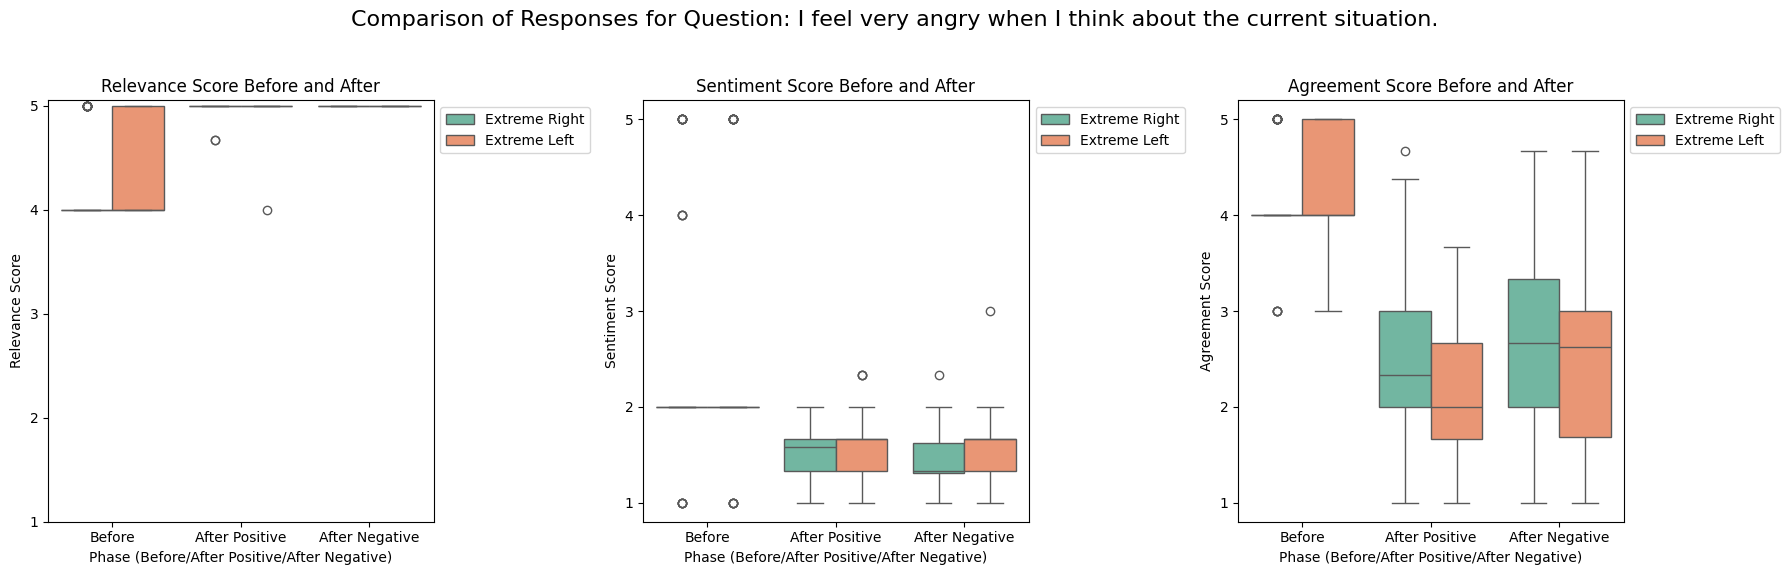

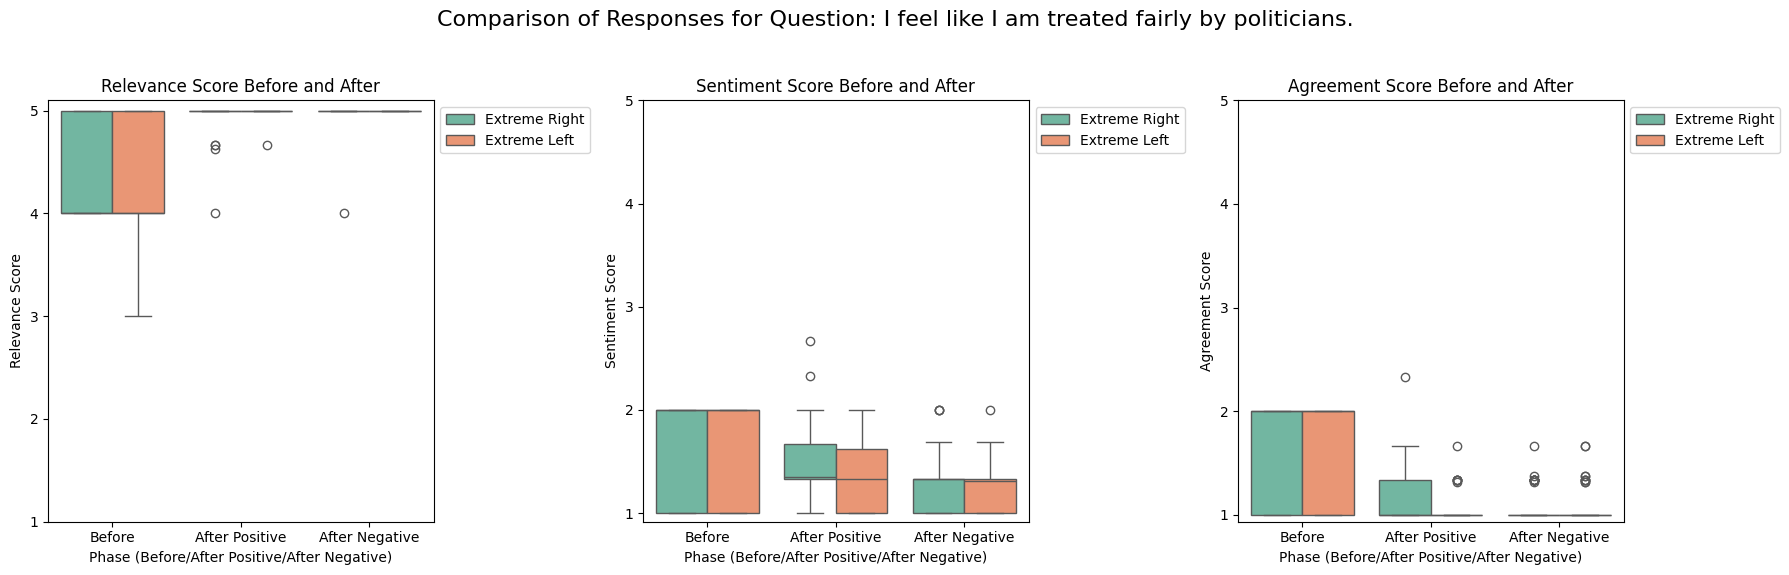

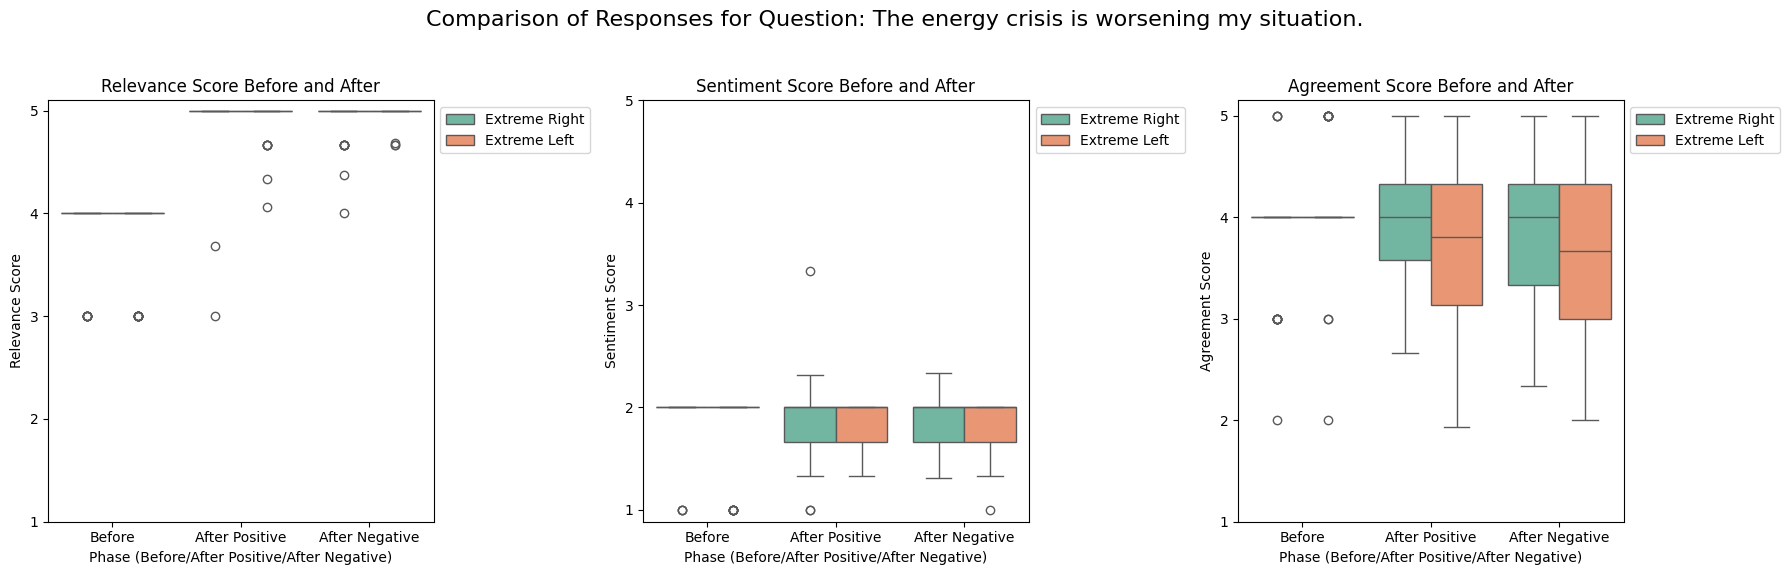

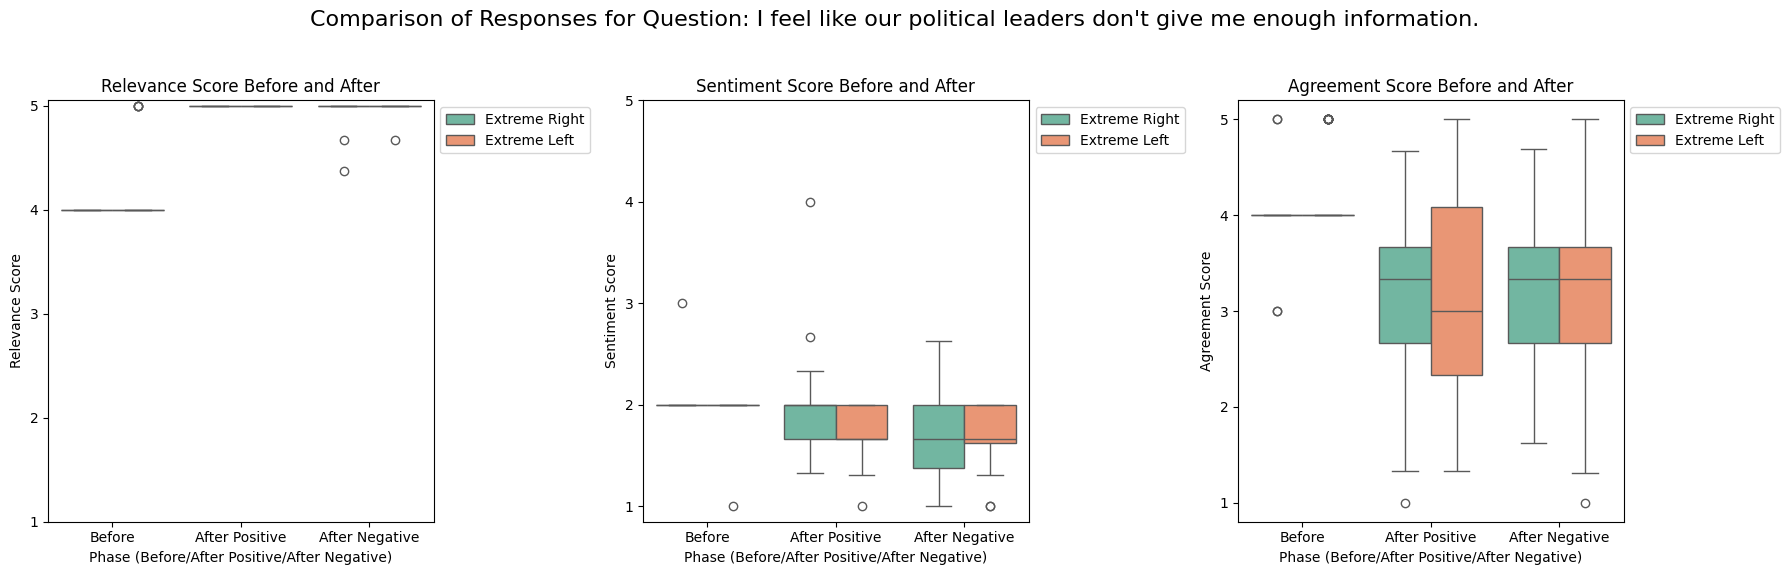

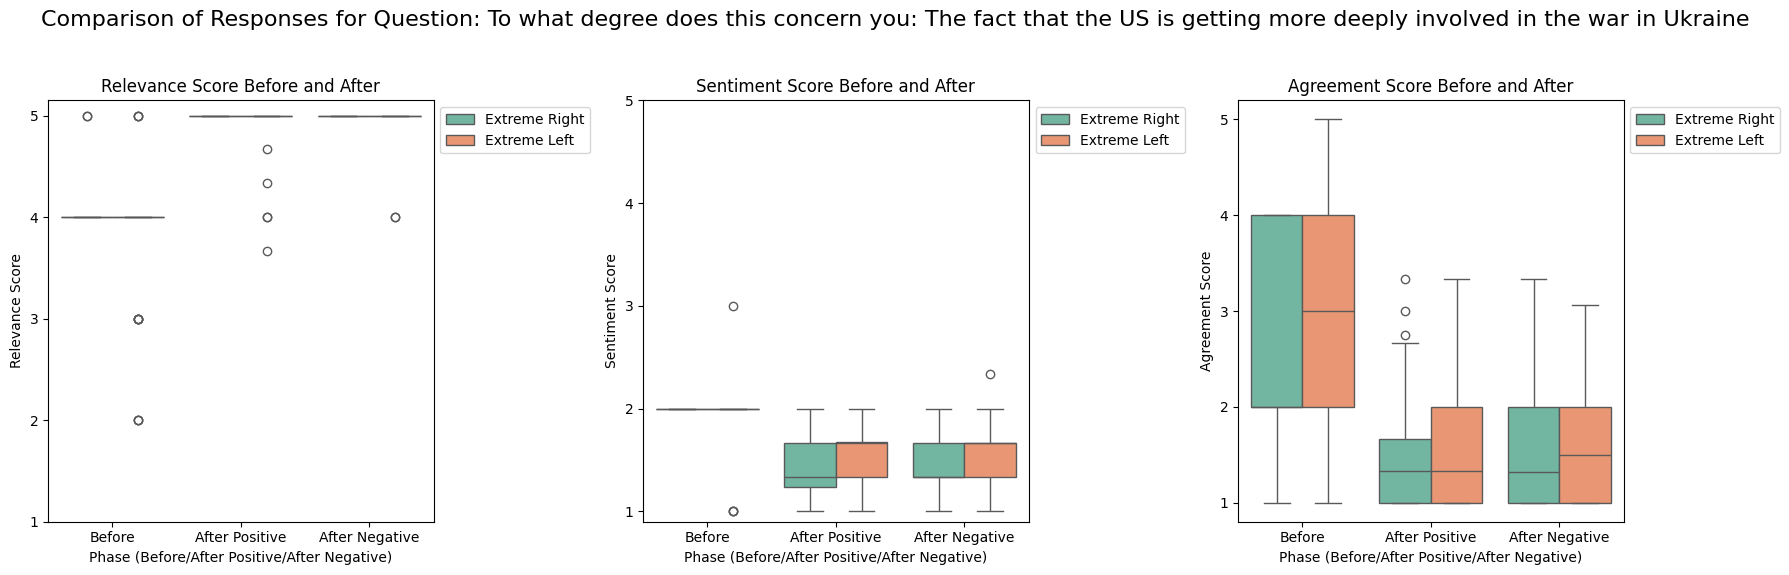

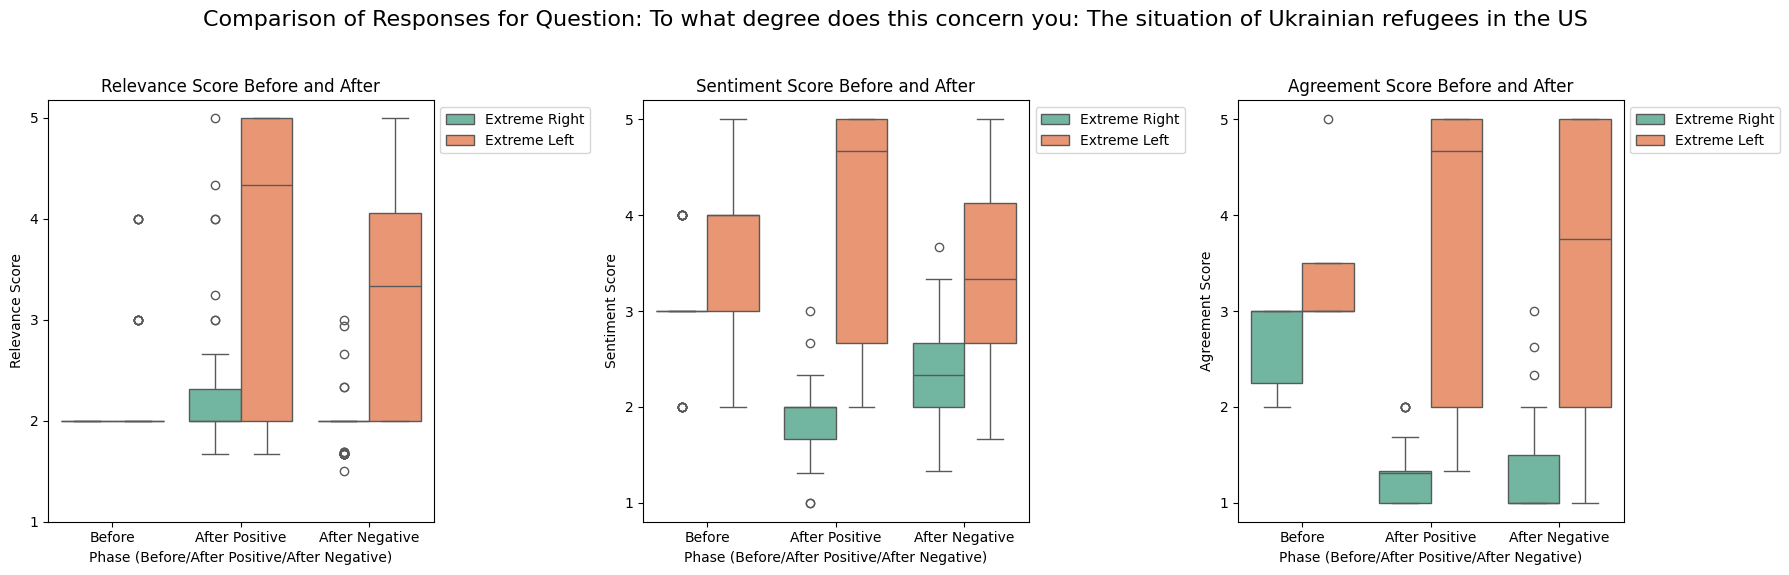

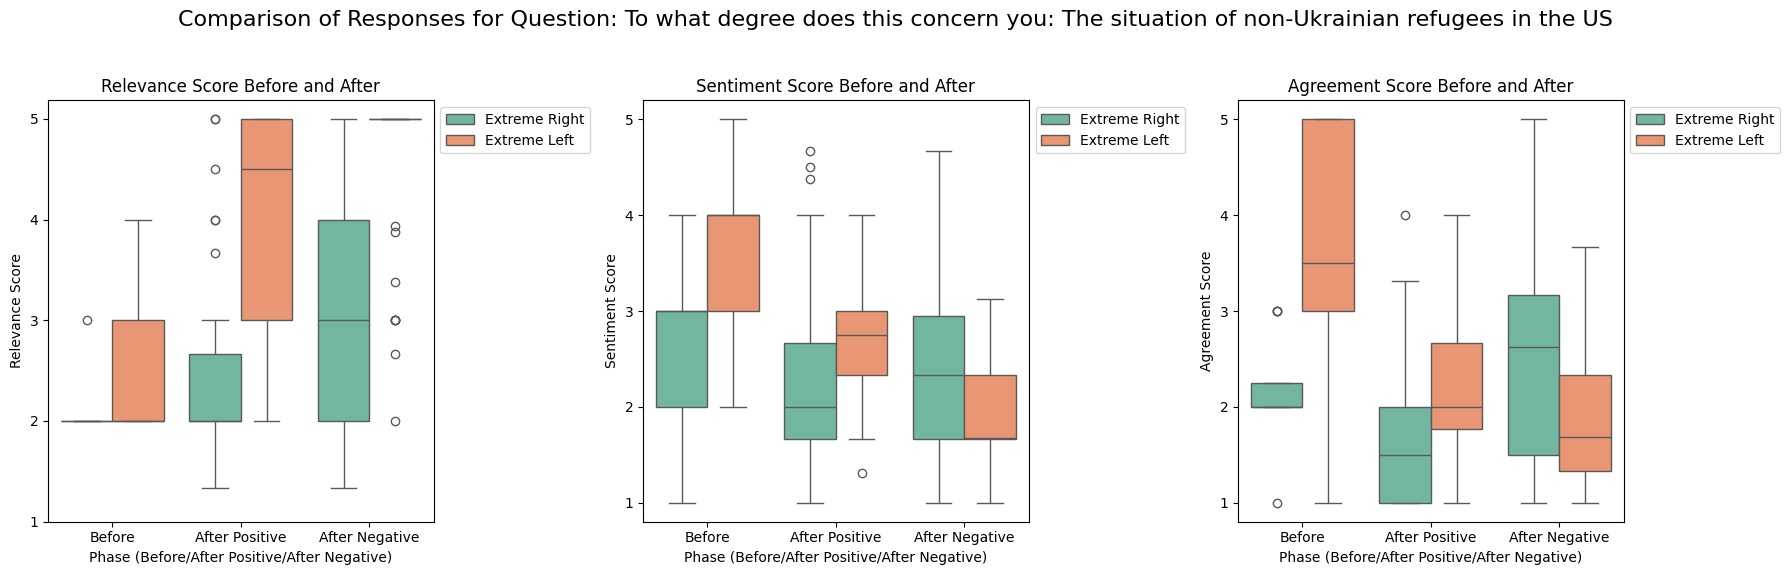

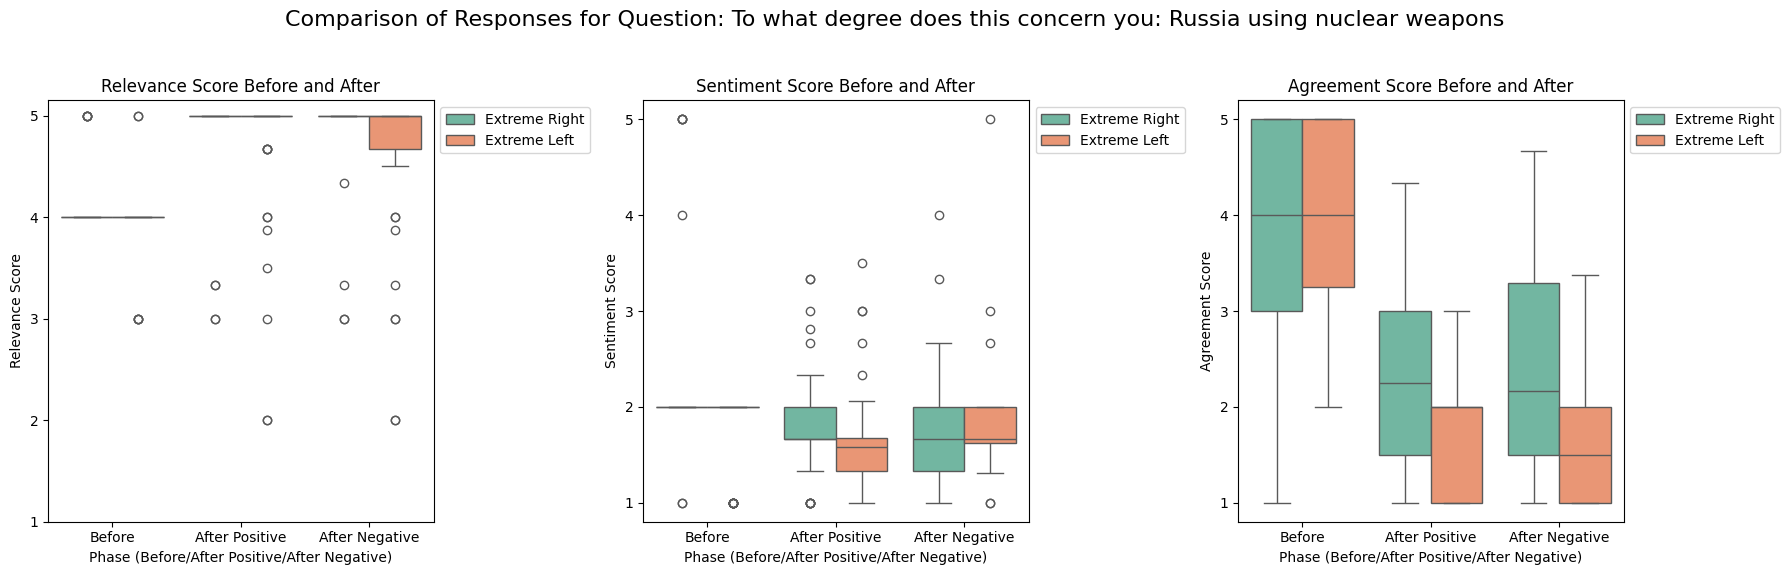

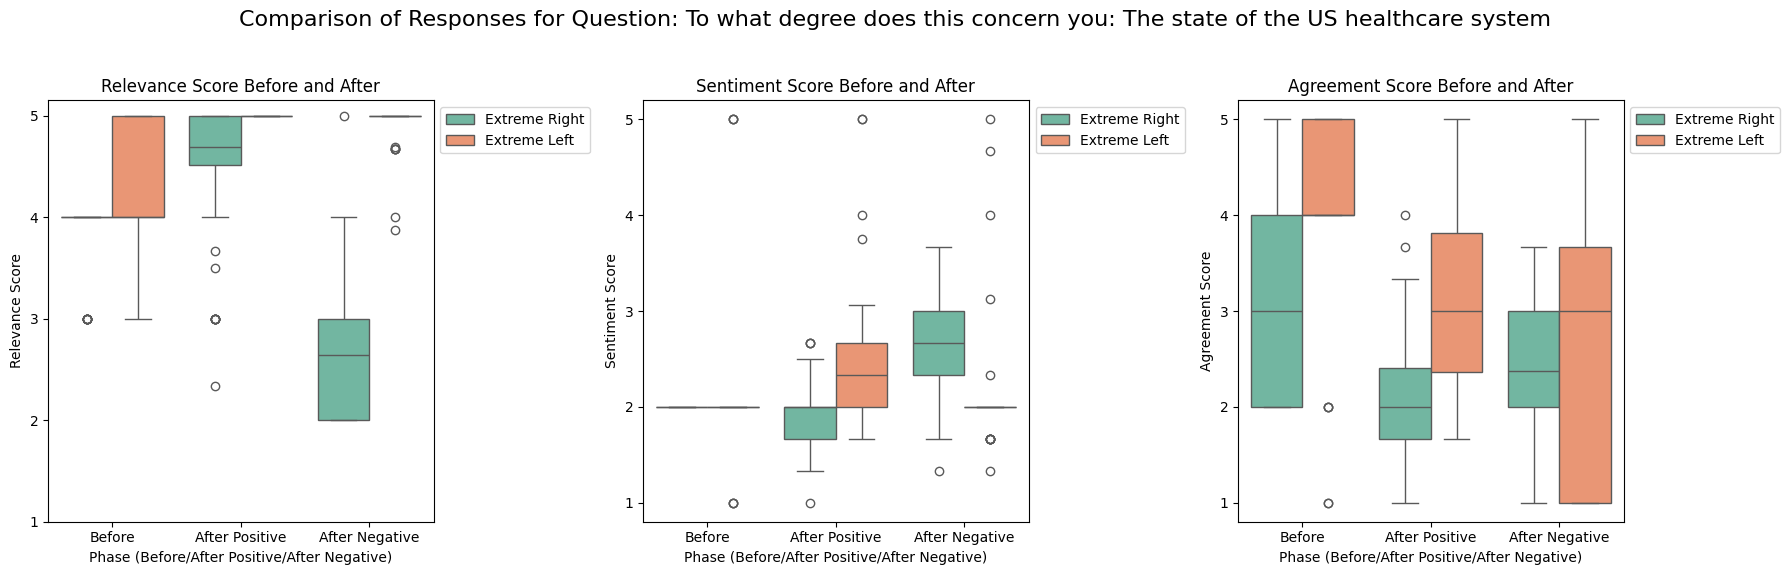

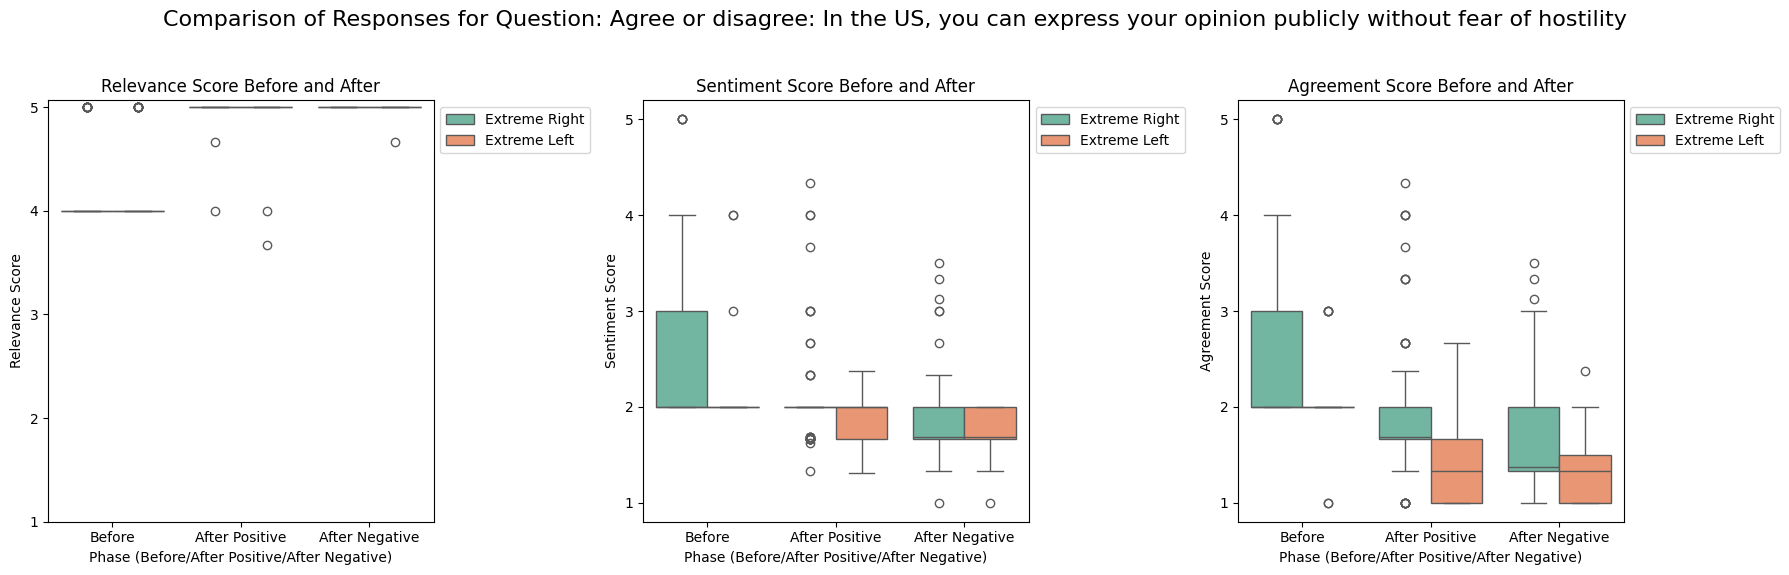

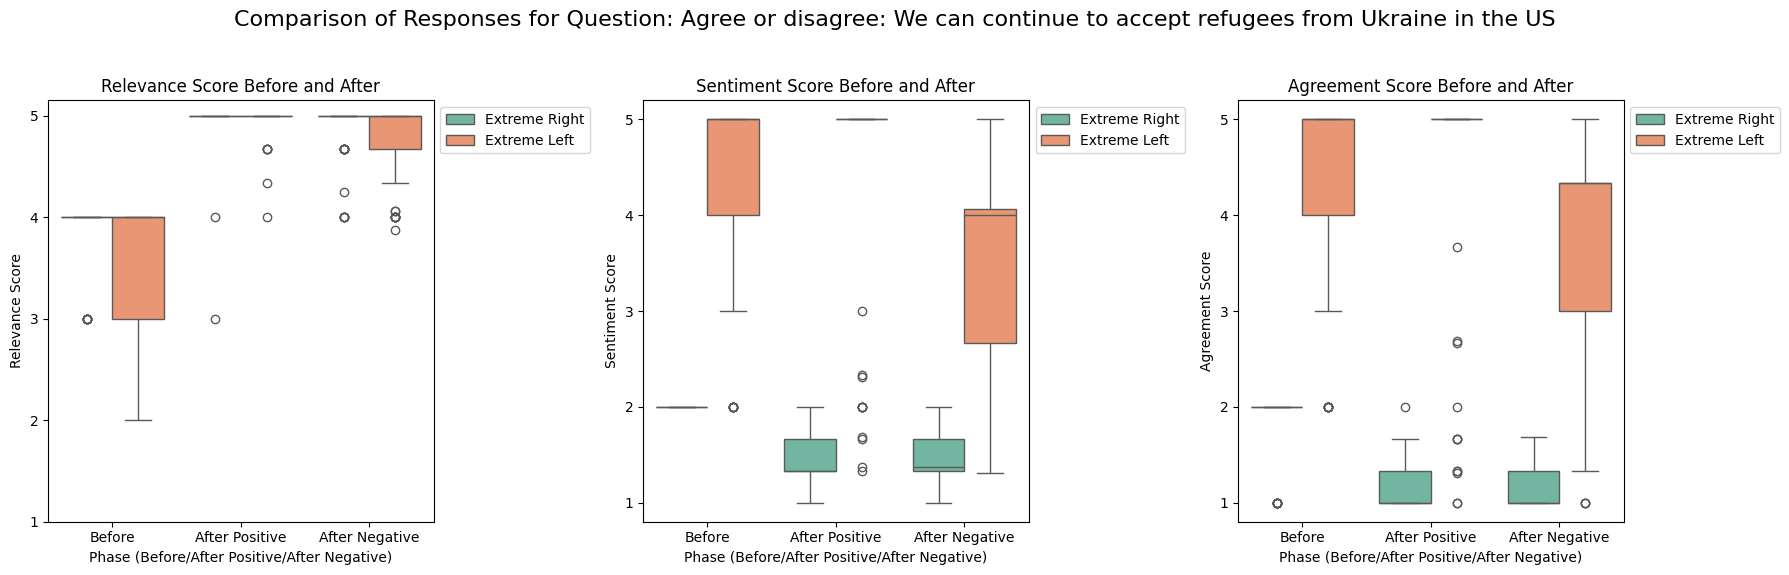

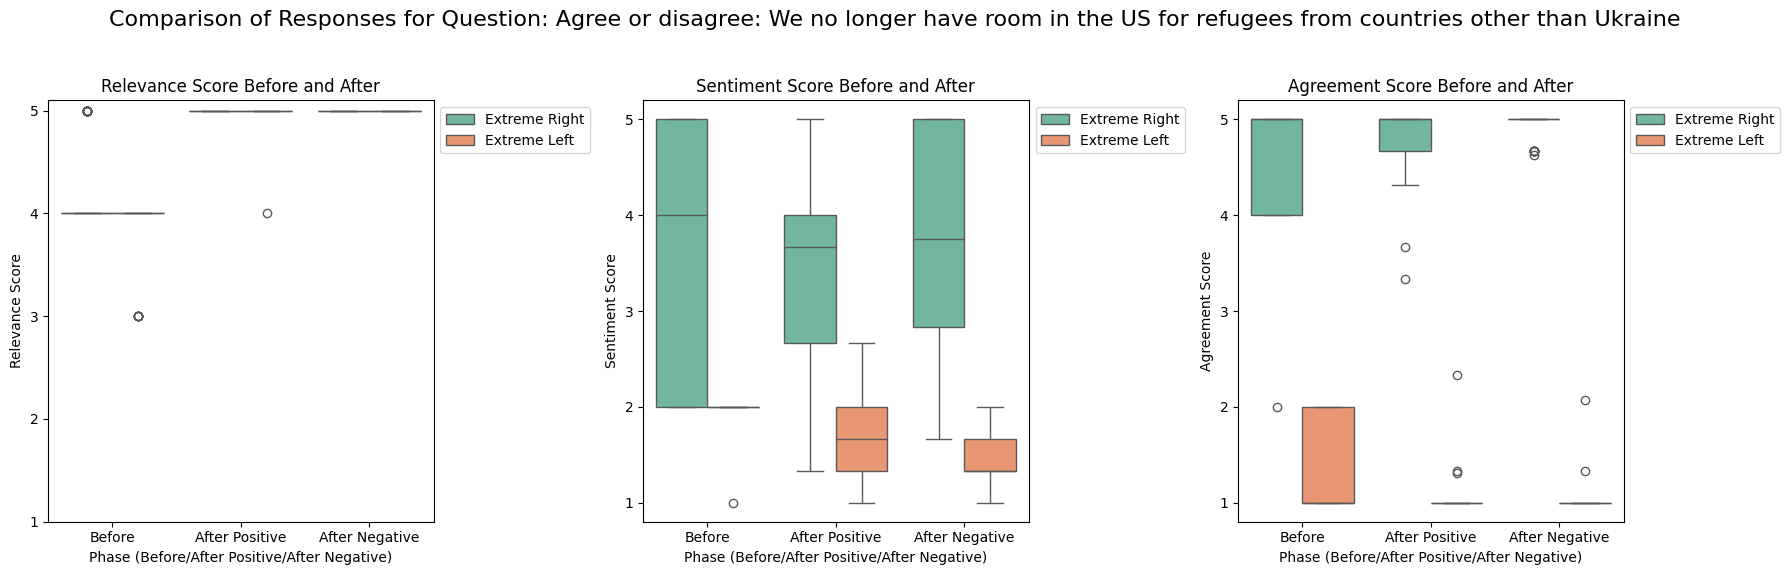

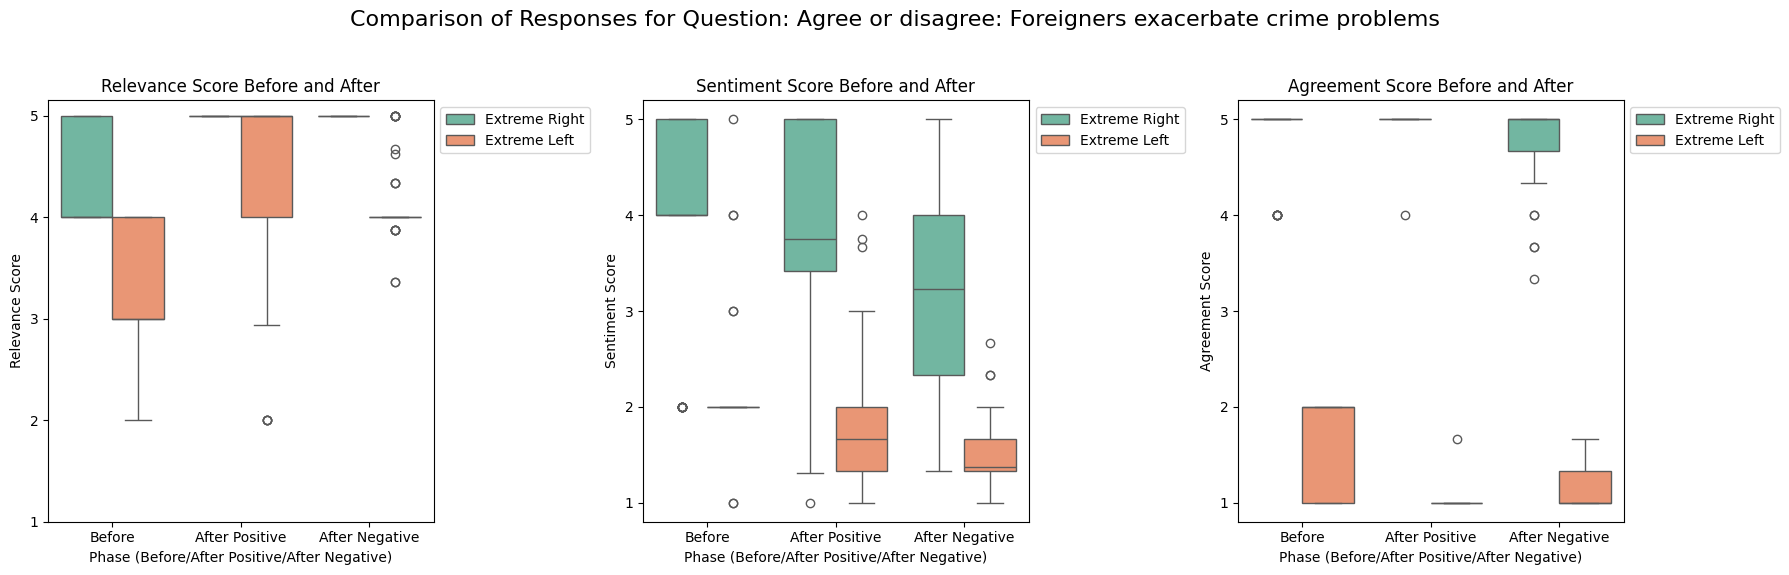

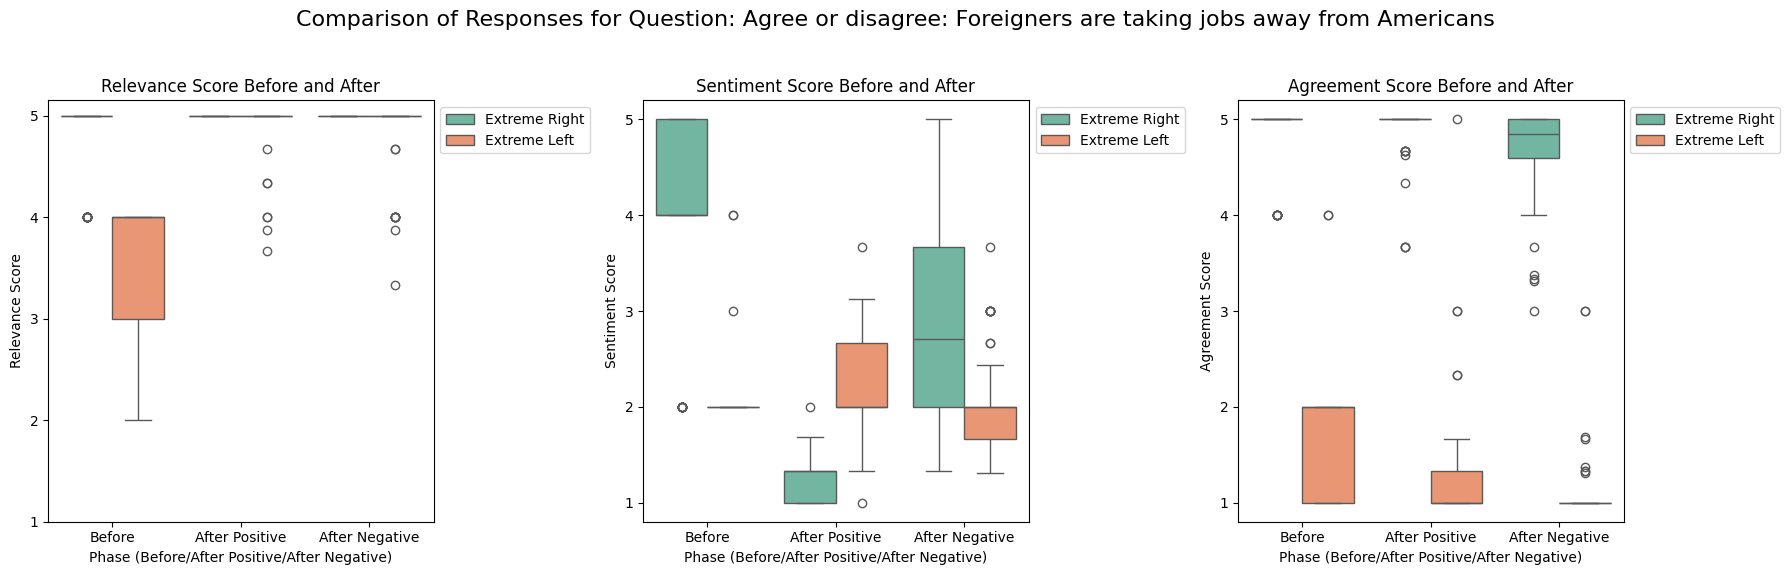

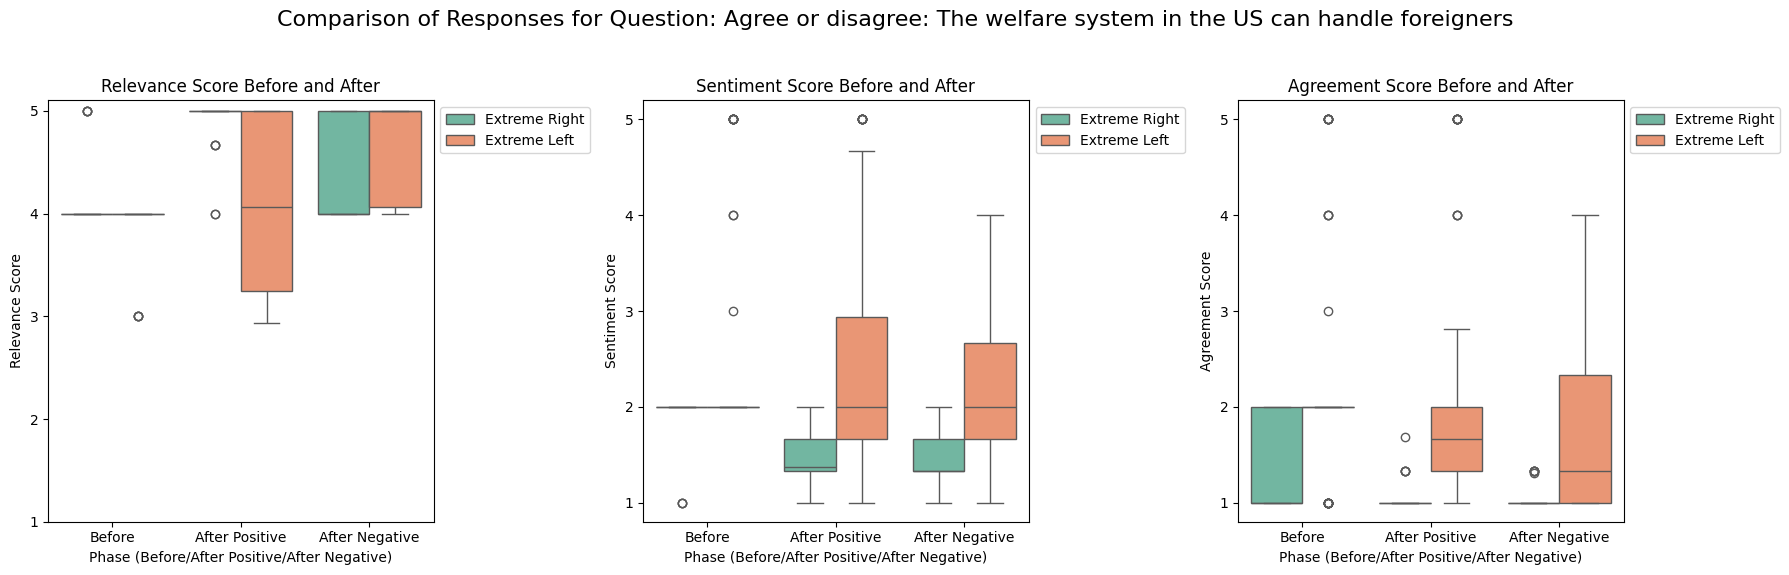

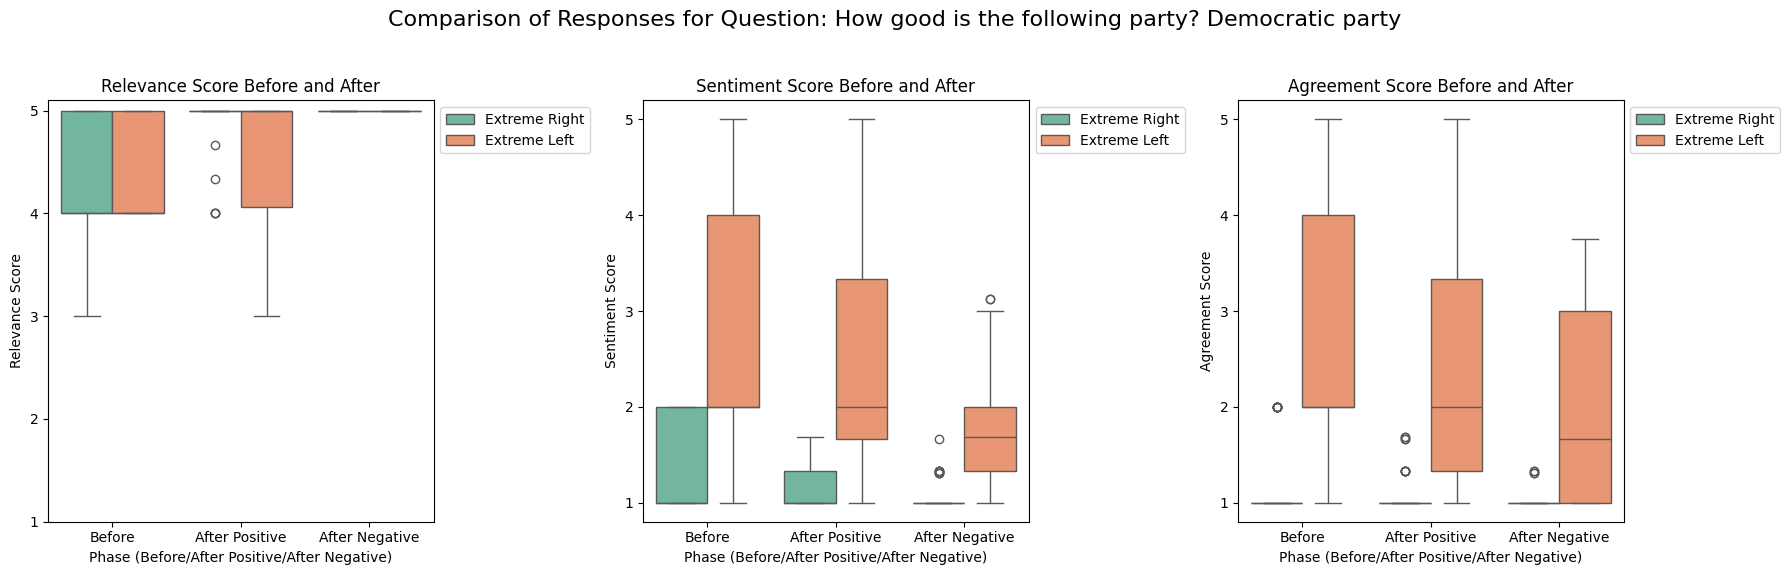

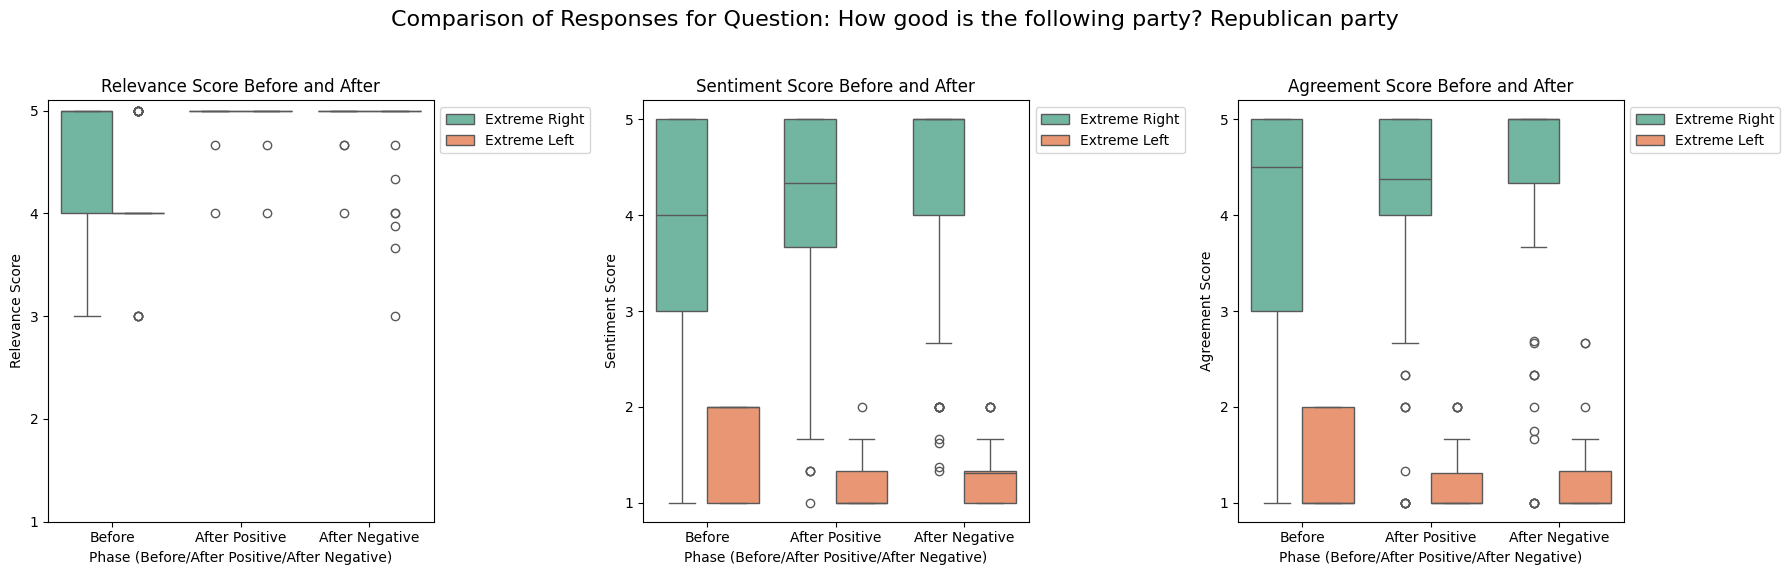

In [2]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Load the original responses (before exposure)
with open('../data/processed/before_responses.json', 'r') as f:
    before_data = json.load(f)

# Convert the JSON data into a DataFrame
before_df = pd.json_normalize(before_data)

# Rename columns for consistency
before_df.rename(columns={
    'response.relevance': 'relevance_before',
    'response.sentiment': 'sentiment_before',
    'response.agreement': 'agreement_before'
}, inplace=True)

# Drop unnecessary columns
before_df = before_df[['user_id', 'question', 'relevance_before', 'sentiment_before', 'agreement_before']]

# Ensure that all 'before' columns are numeric
before_df['relevance_before'] = pd.to_numeric(before_df['relevance_before'], errors='coerce')
before_df['sentiment_before'] = pd.to_numeric(before_df['sentiment_before'], errors='coerce')
before_df['agreement_before'] = pd.to_numeric(before_df['agreement_before'], errors='coerce')

# Load the after responses
with open('../data/processed/after_responses.json', 'r') as f:
    after_data = json.load(f)

# Convert the JSON data into a DataFrame
after_df = pd.json_normalize(after_data)

# Rename columns for consistency
after_df.rename(columns={
    'response.relevance': 'relevance_after',
    'response.sentiment': 'sentiment_after',
    'response.agreement': 'agreement_after',
    'article.sentiment': 'article_sentiment'
}, inplace=True)

# Convert 'N/A' to NaN and ensure numeric types
after_df['relevance_after'] = pd.to_numeric(after_df['relevance_after'], errors='coerce')
after_df['sentiment_after'] = pd.to_numeric(after_df['sentiment_after'], errors='coerce')
after_df['agreement_after'] = pd.to_numeric(after_df['agreement_after'], errors='coerce')

# Aggregate the after responses per persona, question, and article sentiment
agg_after_df = after_df.groupby(['user_id', 'question', 'article_sentiment']).agg({
    'relevance_after': 'mean',
    'sentiment_after': 'mean',
    'agreement_after': 'mean'
}).reset_index()

# Pivot the after responses so that 'positive' and 'negative' are separate columns
pivot_after_df = agg_after_df.pivot_table(index=['user_id', 'question'], columns='article_sentiment', 
                                          values=['relevance_after', 'sentiment_after', 'agreement_after']).reset_index()

# Flatten the multi-level columns
pivot_after_df.columns = ['_'.join(col).strip() for col in pivot_after_df.columns.values]
pivot_after_df.rename(columns={
    'user_id_': 'user_id',
    'question_': 'question',
    'relevance_after_negative': 'relevance_after_negative',
    'relevance_after_positive': 'relevance_after_positive',
    'sentiment_after_negative': 'sentiment_after_negative',
    'sentiment_after_positive': 'sentiment_after_positive',
    'agreement_after_negative': 'agreement_after_negative',
    'agreement_after_positive': 'agreement_after_positive'
}, inplace=True)

# Merge the before responses with the pivoted after responses on 'user_id' and 'question'
merged_df = pd.merge(before_df, pivot_after_df, on=['user_id', 'question'], how='left')

# Load the persona data to get the political positions
persona_df = pd.read_csv("../data/processed/combined_data.csv")

# Clean persona data: Combine "Far Left" and "Extreme Left" into "Extreme Left"
persona_df['Where would you place your own political position?'] = persona_df['Where would you place your own political position?'].replace({'Far Left': 'Extreme Left'})

# Merge the persona data with the merged responses
merged_df = pd.merge(merged_df, persona_df[['user', 'Where would you place your own political position?']], left_on='user_id', right_on='user', how='left')

# Melt the DataFrame to have a long format for easier plotting
melted_df = merged_df.melt(id_vars=['user_id', 'question', 'Where would you place your own political position?'], 
                            value_vars=['relevance_before', 'relevance_after_positive', 'relevance_after_negative',
                                        'sentiment_before', 'sentiment_after_positive', 'sentiment_after_negative',
                                        'agreement_before', 'agreement_after_positive', 'agreement_after_negative'],
                            var_name='phase', value_name='score')

# Extract metric and phase information
melted_df['metric'] = melted_df['phase'].apply(lambda x: x.split('_')[0])
melted_df['phase'] = melted_df['phase'].apply(lambda x: '_'.join(x.split('_')[1:]))

# Visualization: Boxplot per Metric Before, After Positive, and After Negative Exposure for Each Question
unique_questions = melted_df['question'].unique()

for question in unique_questions:
    question_df = melted_df[melted_df['question'] == question]
    
    plt.figure(figsize=(18, 6))
    plt.suptitle(f"Comparison of Responses for Question: {question}", fontsize=16)

    for i, metric in enumerate(['relevance', 'sentiment', 'agreement'], 1):
        plt.subplot(1, 3, i)
        sns.boxplot(data=question_df[question_df['metric'] == metric], 
                    x='phase', y='score', hue='Where would you place your own political position?', 
                    palette='Set2')
        plt.title(f"{metric.capitalize()} Score Before and After")
        plt.xlabel("Phase (Before/After Positive/After Negative)")
        plt.ylabel(f"{metric.capitalize()} Score")
        plt.xticks(ticks=[0, 1, 2], labels=['Before', 'After Positive', 'After Negative'])
        plt.yticks(ticks=range(1, 6))  # Ensure y-ticks are consistent from 1 to 5
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


## T-Test
The goal of this test is to shed light on the effect of media exposure onto changes in opinions. More specifically, we aim at testing whether showing news articles to the agents might be the source of the shift in opinion. All the results are significant, therefore we can confirm that articles influenced shifts in opinon in the agents and that the shifts in relevance, sentiment, and agreement did not happen by chance.

Note: For each question, each agent was shown 3 articles having a positive sentiment about the given topic, and 3 articles having a negative sentiment about the same topic. To avoid dependencies in the data, for each agent, each triple was aggregated, so that each persona contributes only one shift per question, given the selected sentiment.

In [12]:
import pandas as pd
from scipy.stats import ttest_1samp

# Aggregate the shifts for each persona and question
agg_df = merged_df.groupby(['user_id', 'question', 'article_sentiment']).agg({
    'relevance_shift': 'mean',
    'sentiment_shift': 'mean',
    'agreement_shift': 'mean'
}).reset_index()

# Function to perform t-tests on aggregated shifts
def perform_ttest(df, shift_column, sentiment_type):
    # Filter the dataframe by article sentiment
    filtered_df = df[df['article_sentiment'] == sentiment_type]
    
    # Perform a one-sample t-test against zero (since shifts should be zero under the null hypothesis)
    t_stat, p_value = ttest_1samp(filtered_df[shift_column], 0)
    
    return t_stat, p_value

# Perform t-tests for each shift and sentiment type on the aggregated data
for shift in ['relevance_shift', 'sentiment_shift', 'agreement_shift']:
    for sentiment in ['positive', 'negative']:
        t_stat, p_value = perform_ttest(agg_df, shift, sentiment)
        print(f"t-test for {shift} with {sentiment} sentiment:")
        print(f"t-statistic: {t_stat}, p-value: {p_value}")
        print(f"Result: {'Significant' if p_value < 0.05 else 'Not Significant'}\n")

# Check the new sample size
sample_size_agg = agg_df[agg_df['article_sentiment'] == 'positive'].shape[0]
print(f"Adjusted sample size for relevance_shift with positive sentiment: {sample_size_agg}")


t-test for relevance_shift with positive sentiment:
t-statistic: 42.62775282764937, p-value: 1.4192627855940647e-282
Result: Significant

t-test for relevance_shift with negative sentiment:
t-statistic: 39.823833617444514, p-value: 1.6850685538357487e-255
Result: Significant

t-test for sentiment_shift with positive sentiment:
t-statistic: -21.97225323915343, p-value: 5.6904935535154585e-96
Result: Significant

t-test for sentiment_shift with negative sentiment:
t-statistic: -26.452070122647903, p-value: 2.3106635539809513e-132
Result: Significant

t-test for agreement_shift with positive sentiment:
t-statistic: -8.376220071965509, p-value: 1.0181016186269197e-16
Result: Significant

t-test for agreement_shift with negative sentiment:
t-statistic: -13.414430582810825, p-value: 2.422558197662367e-39
Result: Significant

Adjusted sample size for relevance_shift with positive sentiment: 1989


## Which Political Group of Agents is More Likely to Change their Opinion?

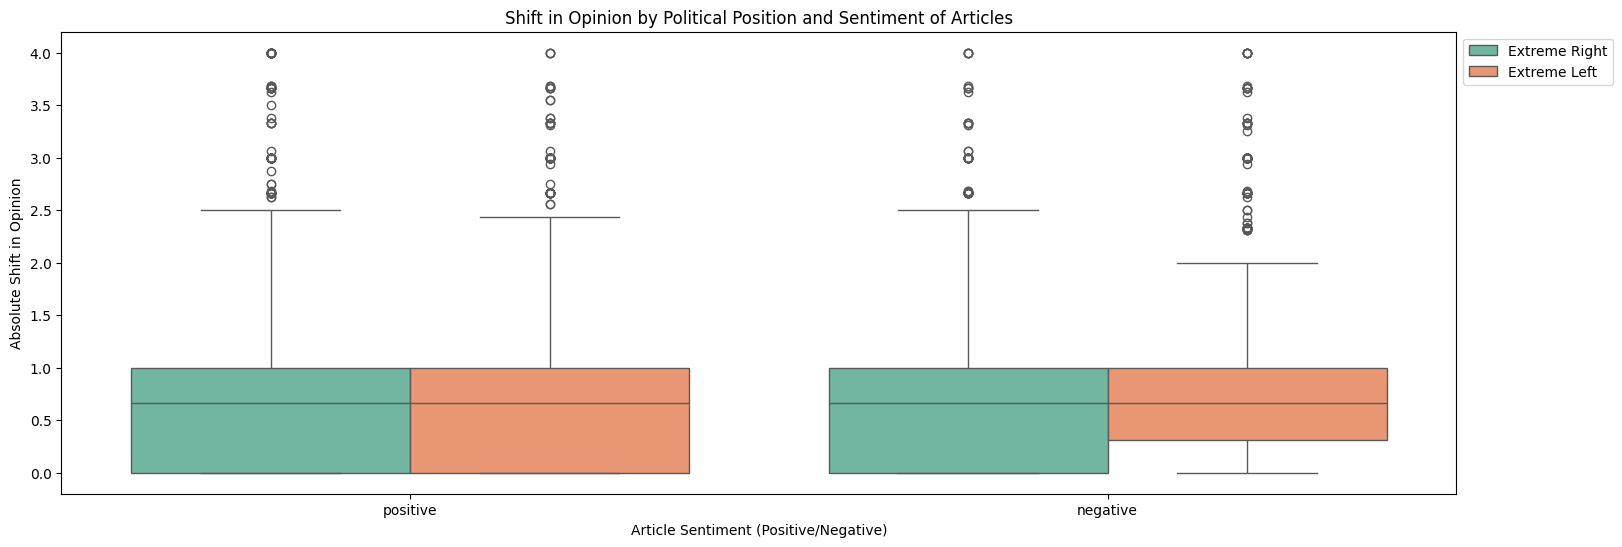

In [3]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Load the original responses (before exposure)
with open('../data/processed/before_responses.json', 'r') as f:
    before_data = json.load(f)

# Convert the JSON data into a DataFrame
before_df = pd.json_normalize(before_data)

# Rename columns for consistency
before_df.rename(columns={
    'response.relevance': 'relevance_before',
    'response.sentiment': 'sentiment_before',
    'response.agreement': 'agreement_before'
}, inplace=True)

# Drop unnecessary columns
before_df = before_df[['user_id', 'question', 'relevance_before', 'sentiment_before', 'agreement_before']]

# Ensure that all 'before' columns are numeric
before_df['relevance_before'] = pd.to_numeric(before_df['relevance_before'], errors='coerce')
before_df['sentiment_before'] = pd.to_numeric(before_df['sentiment_before'], errors='coerce')
before_df['agreement_before'] = pd.to_numeric(before_df['agreement_before'], errors='coerce')

# Load the after responses
with open('../data/processed/after_responses.json', 'r') as f:
    after_data = json.load(f)

# Convert the JSON data into a DataFrame
after_df = pd.json_normalize(after_data)

# Rename columns for consistency
after_df.rename(columns={
    'response.relevance': 'relevance_after',
    'response.sentiment': 'sentiment_after',
    'response.agreement': 'agreement_after',
    'article.sentiment': 'article_sentiment'
}, inplace=True)

# Convert 'N/A' to NaN and ensure numeric types
after_df['relevance_after'] = pd.to_numeric(after_df['relevance_after'], errors='coerce')
after_df['sentiment_after'] = pd.to_numeric(after_df['sentiment_after'], errors='coerce')
after_df['agreement_after'] = pd.to_numeric(after_df['agreement_after'], errors='coerce')

# Aggregate the after responses per persona, question, and article sentiment
agg_after_df = after_df.groupby(['user_id', 'question', 'article_sentiment']).agg({
    'relevance_after': 'mean',
    'sentiment_after': 'mean',
    'agreement_after': 'mean'
}).reset_index()

# Pivot the after responses so that 'positive' and 'negative' are separate columns
pivot_after_df = agg_after_df.pivot_table(index=['user_id', 'question'], columns='article_sentiment', 
                                          values=['relevance_after', 'sentiment_after', 'agreement_after']).reset_index()

# Flatten the multi-level columns
pivot_after_df.columns = ['_'.join(col).strip() for col in pivot_after_df.columns.values]
pivot_after_df.rename(columns={
    'user_id_': 'user_id',
    'question_': 'question',
    'relevance_after_negative': 'relevance_after_negative',
    'relevance_after_positive': 'relevance_after_positive',
    'sentiment_after_negative': 'sentiment_after_negative',
    'sentiment_after_positive': 'sentiment_after_positive',
    'agreement_after_negative': 'agreement_after_negative',
    'agreement_after_positive': 'agreement_after_positive'
}, inplace=True)

# Merge the before responses with the pivoted after responses on 'user_id' and 'question'
merged_df = pd.merge(before_df, pivot_after_df, on=['user_id', 'question'], how='left')

# Calculate the absolute shifts
merged_df['relevance_shift_positive'] = (merged_df['relevance_after_positive'] - merged_df['relevance_before']).abs()
merged_df['relevance_shift_negative'] = (merged_df['relevance_after_negative'] - merged_df['relevance_before']).abs()

merged_df['sentiment_shift_positive'] = (merged_df['sentiment_after_positive'] - merged_df['sentiment_before']).abs()
merged_df['sentiment_shift_negative'] = (merged_df['sentiment_after_negative'] - merged_df['sentiment_before']).abs()

merged_df['agreement_shift_positive'] = (merged_df['agreement_after_positive'] - merged_df['agreement_before']).abs()
merged_df['agreement_shift_negative'] = (merged_df['agreement_after_negative'] - merged_df['agreement_before']).abs()

# Load the persona data to get the political positions
persona_df = pd.read_csv("../data/processed/combined_data.csv")

# Clean persona data: Combine "Far Left" and "Extreme Left" into "Extreme Left"
persona_df['Where would you place your own political position?'] = persona_df['Where would you place your own political position?'].replace({'Far Left': 'Extreme Left'})

# Merge the persona data with the merged responses
merged_df = pd.merge(merged_df, persona_df[['user', 'Where would you place your own political position?']], left_on='user_id', right_on='user', how='left')

# Melt the DataFrame to have a long format for easier plotting
melted_df = merged_df.melt(id_vars=['user_id', 'question', 'Where would you place your own political position?'], 
                            value_vars=['relevance_shift_positive', 'relevance_shift_negative',
                                        'sentiment_shift_positive', 'sentiment_shift_negative',
                                        'agreement_shift_positive', 'agreement_shift_negative'],
                            var_name='shift_type', value_name='shift_value')

# Extract metric and phase information
melted_df['metric'] = melted_df['shift_type'].apply(lambda x: x.split('_')[0])
melted_df['phase'] = melted_df['shift_type'].apply(lambda x: '_'.join(x.split('_')[2:]))

# Visualization: Boxplot per Metric and Shift Type (Positive/Negative) for Each Political Position
plt.figure(figsize=(18, 6))
sns.boxplot(data=melted_df, x='phase', y='shift_value', hue='Where would you place your own political position?', palette='Set2')
plt.title("Shift in Opinion by Political Position and Sentiment of Articles")
plt.xlabel("Article Sentiment (Positive/Negative)")
plt.ylabel("Absolute Shift in Opinion")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


The boxplot shows the distribution of the absolute shift in opinion based on article sentiment (positive or negative) and political position (Extreme Right or Extreme Left).
The interquartile range (IQR) and the median give us an indication of the likelihood of opinion change.
Observations:

The median shift in opinion is similar between the two groups (Extreme Right and Extreme Left) across both positive and negative articles.
The Extreme Right group has a wider spread (larger IQR) in opinion shift for both positive and negative sentiment articles, indicating more variability in how much their opinions change.
The Extreme Left group, while showing a similar median shift, has a more consistent and less variable response.


The Extreme Right group appears to be more likely to have a greater change in opinion, as indicated by the wider spread of the data (larger IQR), especially for the positive sentiment articles. This suggests that individuals on the Extreme Right may be more susceptible to larger shifts in opinion compared to those on the Extreme Left.

This is consistent with the findings about left-wing bias in LLMs. The models almost "look forward" to return to their original parameters.